# BLM example

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# Add PyTwoWay to system path (SET THESE TO WHERE YOU HAVE THE PACKAGE REPOSITORIES CLONED)
import sys
sys.path.append('../../..')

In [3]:
# Import the PyTwoWay package 
# (Make sure you have installed it using pip install pytwoway)
import numpy as np
import bipartitepandas as bpd
import pytwoway as tw
from matplotlib import pyplot as plt

## First, check out parameter options

In [4]:
print('----- BLM -----')
tw.blm_params().describe_all()
print('----- Clustering -----')
bpd.cluster_params().describe_all()
print('----- Cleaning -----')
bpd.clean_params().describe_all()
print('----- Simulation -----')
bpd.sim_params().describe_all()

----- BLM -----
KEY: 'nl'
CURRENT VALUE: 6
VALID VALUES: one of type <class 'int'>
CONSTRAINTS: '>= 1'
DESCRIPTION: 
            (default=6) Number of worker types.
        
KEY: 'nk'
CURRENT VALUE: 10
VALID VALUES: one of type <class 'int'>
CONSTRAINTS: '>= 1'
DESCRIPTION: 
            (default=10) Number of firm types.
        
KEY: 'custom_independent_dict'
CURRENT VALUE: None
VALID VALUES: None or one of type <class 'dict'>
DESCRIPTION: 
            (default=None) Dictionary of custom general column names (to use as controls) linked to the number of types for that column, where the estimated parameters should be independent of worker/firm type pairs. In other words, any column listed as a member of this parameter will have the same parameter estimated for each worker-firm type pair (the parameter value can still differ over time). None is equivalent to {}.
        
KEY: 'custom_dependent_dict'
CURRENT VALUE: None
VALID VALUES: None or one of type <class 'dict'>
DESCRIPTION: 
      

## Second, set parameter choices

In [5]:
nl = 2 # Number of worker types
nk = 3 # Number of firm types
blm_params = tw.blm_params({'nl': nl, 'nk': nk, 'fixb': False, 'stationary': False, 'n_iters_movers': 100, 'threshold_movers': 1e-7, 'd_prior': 1.0001, 'verbose': 0, 'custom_independent_dict': {'l': nl}, 'verbose': 2})
cluster_params = bpd.cluster_params({'measures': bpd.measures.CDFs(), 'grouping': bpd.grouping.KMeans(n_clusters=nk), 'is_sorted': True, 'copy': False})
clean_params = bpd.clean_params({'drop_returns': 'returners', 'copy': False})
sim_params = bpd.sim_params({'nl': nl, 'nk': nk})

## Simulate data

Simulate a bipartite network using BipartitePandas. We use this here to demonstrate how to fit the estimator using real data.

In [6]:
sim_data = bpd.BipartiteDataFrame(bpd.SimBipartite(sim_params).simulate()[['i', 'j', 'y', 't', 'l']]).clean(clean_params).cluster(cluster_params).collapse(is_sorted=True, copy=False).to_eventstudy(is_sorted=True, copy=False)
print('Movers data')
display(sim_data[sim_data['m'] > 0])
print('Stayers data')
display(sim_data[sim_data['m'] == 0])

checking required columns and datatypes
sorting rows
dropping NaN observations
generating 'm' column
keeping highest paying job for i-t (worker-year) duplicates (how='max')
dropping workers who leave a firm then return to it (how='returners')
making 'i' ids contiguous
making 'j' ids contiguous
computing largest connected set (how=None)
sorting columns
resetting index
Movers data


,i,j1,j2,y1,y2,t11,t12,t21,t22,g1,g2,w1,w2,m,l1,l2
0,0,105,107,0.806403,-1.893875,0,0,1,1,2,2,1,1,1,0.0,0.0
1,0,107,67,-1.893875,-0.412907,1,1,2,3,2,2,1,2,1,0.0,0.0
2,0,67,61,-0.412907,-1.746910,2,3,4,4,2,1,2,1,1,0.0,0.0
3,1,15,12,-1.400379,-0.768429,0,1,2,2,1,1,2,1,1,0.0,0.0
4,1,12,34,-0.768429,-0.920948,2,2,3,3,1,1,1,1,1,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20195,9925,122,156,0.971442,1.133285,1,2,3,4,2,0,2,2,1,1.0,1.0
20196,9926,169,92,0.728871,-0.026888,0,2,3,4,0,2,3,2,1,0.0,0.0
20197,9927,9,113,-1.832677,0.151924,0,0,1,1,1,2,1,1,1,0.0,0.0
20198,9927,113,39,0.151924,0.242922,1,1,2,2,2,1,1,1,1,0.0,0.0


Stayers data


,i,j1,j2,y1,y2,t11,t12,t21,t22,g1,g2,w1,w2,m,l1,l2
13,6,103,103,0.314691,0.314691,0,4,0,4,2,2,5,5,0,0.0,0.0
14,7,48,48,-1.092174,-1.092174,0,4,0,4,1,1,5,5,0,0.0,0.0
39,19,17,17,-1.952357,-1.952357,0,4,0,4,1,1,5,5,0,0.0,0.0
45,22,150,150,1.496831,1.496831,0,4,0,4,0,0,5,5,0,1.0,1.0
81,40,13,13,-1.328696,-1.328696,0,4,0,4,1,1,5,5,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20038,9849,73,73,0.052071,0.052071,0,4,0,4,2,2,5,5,0,1.0,1.0
20070,9864,0,0,-0.987825,-0.987825,0,4,0,4,1,1,5,5,0,0.0,0.0
20093,9875,108,108,0.071658,0.071658,0,4,0,4,2,2,5,5,0,0.0,0.0
20145,9900,20,20,-1.344224,-1.344224,0,4,0,4,1,1,5,5,0,0.0,0.0


## Initialize and run BLMEstimator

In [7]:
# Initialize BLM estimator
blm_fit = tw.BLMEstimator(blm_params)
# Fit BLM estimator
blm_fit.fit(jdata=sim_data[sim_data['m'] > 0], sdata=sim_data[sim_data['m'] == 0], n_init=40, n_best=5, ncore=1)

  0%|                                                    | 0/40 [00:00<?, ?it/s]

Running fixm movers
loop 0, liks -3.409666562017269
loop 1, liks -3.527186765997186
loop 2, liks -3.5224328361752306
loop 3, liks -3.4996746650738544
loop 4, liks -3.4780505690946653
loop 5, liks -3.4584494006963418
loop 6, liks -3.4403822925146472
loop 7, liks -3.4234873780037396
loop 8, liks -3.407622317152187
loop 9, liks -3.392862176272254
loop 10, liks -3.3794477131531044
loop 11, liks -3.367682463808293
loop 12, liks -3.3577981075908494
loop 13, liks -3.349845359526099
loop 14, liks -3.3436714336063873
loop 15, liks -3.338987181677519
loop 16, liks -3.3354650966407053
loop 17, liks -3.33281025477987
loop 18, liks -3.330788828501089
loop 19, liks -3.3292280297303902
loop 20, liks -3.3280045706145045
loop 21, liks -3.327031607779572
loop 22, liks -3.32624793184831
loop 23, liks -3.325610046195303
loop 24, liks -3.325086683870225
loop 25, liks -3.3246551140565535
loop 26, liks -3.3242986868552156
loop 27, liks -3.324005215937815
loop 28, liks -3.3237659278349176
loop 29, liks -3.323

  2%|█                                           | 1/40 [00:04<02:45,  4.25s/it]

loop 80, liks -3.0807872206264597
loop 81, liks -3.0807871240105333
Running fixm movers
loop 0, liks -3.4299056669225356
loop 1, liks -3.4684007564310346
loop 2, liks -3.4606606220922584
loop 3, liks -3.4568220359779676
loop 4, liks -3.4534569686762517
loop 5, liks -3.450118898259979
loop 6, liks -3.4467486848677655
loop 7, liks -3.4433261546520715
loop 8, liks -3.4398379743764846
loop 9, liks -3.4362790963644274
loop 10, liks -3.432653008416752
loop 11, liks -3.4289701584081
loop 12, liks -3.425245227282863
loop 13, liks -3.421494024225628
loop 14, liks -3.417730704306012
loop 15, liks -3.4139658024461075
loop 16, liks -3.4102052994937666
loop 17, liks -3.406450678397146
loop 18, liks -3.4026997538942747
loop 19, liks -3.39894798459241
loop 20, liks -3.3951899829302867
loop 21, liks -3.39142099225969
loop 22, liks -3.387638169354943
loop 23, liks -3.383841574210876
loop 24, liks -3.38003481810283
loop 25, liks -3.376225355331986
loop 26, liks -3.372424428052951
loop 27, liks -3.368646

loop 58, liks -3.0807949438194817
loop 59, liks -3.080794137023729
loop 60, liks -3.0807934043875673
loop 61, liks -3.0807927391018417
loop 62, liks -3.0807921349808653
loop 63, liks -3.0807915864057107
loop 64, liks -3.080791088272596
loop 65, liks -3.0807906359458817
loop 66, liks -3.0807902252153343
loop 67, liks -3.080789852257206
loop 68, liks -3.0807895135988907
loop 69, liks -3.0807892060867514
loop 70, liks -3.0807889268568958
loop 71, liks -3.0807886733086014
loop 72, liks -3.0807884430801766
loop 73, liks -3.0807882340270174
loop 74, liks -3.0807880442016873
loop 75, liks -3.0807878718357897
loop 76, liks -3.08078771532354


  5%|██▏                                         | 2/40 [00:08<02:41,  4.25s/it]

loop 77, liks -3.0807875732068095
loop 78, liks -3.0807874441615617
loop 79, liks -3.080787326985528
loop 80, liks -3.080787220587009
loop 81, liks -3.0807871239747135
Running fixm movers
loop 0, liks -3.610380258028049
loop 1, liks -3.5457124392123416
loop 2, liks -3.535116023701337
loop 3, liks -3.51849013196492
loop 4, liks -3.501076460921496
loop 5, liks -3.4861338874026715
loop 6, liks -3.473792127887147
loop 7, liks -3.46383697206389
loop 8, liks -3.455875858956861
loop 9, liks -3.449465732433911
loop 10, liks -3.4442035764105206
loop 11, liks -3.4397692445643613
loop 12, liks -3.435930929065901
loop 13, liks -3.4325311695833074
loop 14, liks -3.429467415727818
loop 15, liks -3.4266743630234906
loop 16, liks -3.4241104252851393
loop 17, liks -3.421748333296494
loop 18, liks -3.4195690319900995
loop 19, liks -3.417557944980343
loop 20, liks -3.4157028239818668
loop 21, liks -3.4139926007516466
loop 22, liks -3.4124168385150746
loop 23, liks -3.410965519225492
loop 24, liks -3.4096

loop 40, liks -3.0805067316822674
loop 41, liks -3.080533622520677
loop 42, liks -3.0805577774625403
loop 43, liks -3.0805795053630276
loop 44, liks -3.0805990743617877
loop 45, liks -3.080616718233805
loop 46, liks -3.080632641617116
loop 47, liks -3.0806470243279063
loop 48, liks -3.080660024934323
loop 49, liks -3.0806717837278415
loop 50, liks -3.080682425204426
loop 51, liks -3.0806920601460104
loop 52, liks -3.080700787375237
loop 53, liks -3.080708695242269
loop 54, liks -3.0807158628910494
loop 55, liks -3.0807223613432804
loop 56, liks -3.0807282544310475
loop 57, liks -3.0807335996031644
loop 58, liks -3.080738448625646
loop 59, liks -3.0807428481928842
loop 60, liks -3.0807468404632052
loop 61, liks -3.080750463529947
loop 62, liks -3.080753751837337
loop 63, liks -3.0807567365488295
loop 64, liks -3.0807594458743215
loop 65, liks -3.0807619053616184
loop 66, liks -3.080764138156663
loop 67, liks -3.080766165236408
loop 68, liks -3.080768005617571
loop 69, liks -3.0807696765

  8%|███▎                                        | 3/40 [00:13<02:42,  4.39s/it]

loop 97, liks -3.0807850630136526
loop 98, liks -3.080785164834074
loop 99, liks -3.08078525729089
Running fixm movers
loop 0, liks -3.653868666186182
loop 1, liks -3.696803729652915
loop 2, liks -3.660066352085238
loop 3, liks -3.630346400987632
loop 4, liks -3.601964988638057
loop 5, liks -3.5754862028991727
loop 6, liks -3.5512280932171074
loop 7, liks -3.5293541672663546
loop 8, liks -3.5099068404589233
loop 9, liks -3.4928360746003504
loop 10, liks -3.478021086547061
loop 11, liks -3.465289338479494
loop 12, liks -3.4544351848206283
loop 13, liks -3.44523755949456
loop 14, liks -3.4374750982988886
loop 15, liks -3.430937597246969
loop 16, liks -3.425433563533313
loop 17, liks -3.420794234254605
loop 18, liks -3.416874754462341
loop 19, liks -3.4135533138531002
loop 20, liks -3.410729011286891
loop 21, liks -3.4083190939572665
loop 22, liks -3.4062560494782494
loop 23, liks -3.4044848586217773
loop 24, liks -3.4029605737485786
loop 25, liks -3.4016462847008246
loop 26, liks -3.4005

 10%|████▍                                       | 4/40 [00:16<02:24,  4.02s/it]

loop 72, liks -3.0807884427017744
loop 73, liks -3.0807882336833794
loop 74, liks -3.0807880438896187
loop 75, liks -3.0807878715523995
loop 76, liks -3.0807877150661924
loop 77, liks -3.080787572973114
loop 78, liks -3.0807874439493474
loop 79, liks -3.0807873267928225
loop 80, liks -3.0807872204120184
loop 81, liks -3.0807871238158113
Running fixm movers
loop 0, liks -3.8397378789062406
loop 1, liks -3.8562710783469742
loop 2, liks -3.8665283968837243
loop 3, liks -3.8621758109982527
loop 4, liks -3.858714873200988
loop 5, liks -3.8556386051647316
loop 6, liks -3.8528159300010443
loop 7, liks -3.8502199016662995
loop 8, liks -3.847837425063234
loop 9, liks -3.845656847990424
loop 10, liks -3.843666943946713
loop 11, liks -3.841856928045498
loop 12, liks -3.8402164590621792
loop 13, liks -3.8387355625554815
loop 14, liks -3.837404512176671
loop 15, liks -3.836213711762747
loop 16, liks -3.8351536120113843
loop 17, liks -3.834214681282589
loop 18, liks -3.8333874341348504
loop 19, liks

loop 47, liks -3.08081156441908
loop 48, liks -3.0808092304695425
loop 49, liks -3.0808071107164823
loop 50, liks -3.0808051855766743
loop 51, liks -3.080803437240289
loop 52, liks -3.080801849514117
loop 53, liks -3.080800407677783
loop 54, liks -3.08079909835211
loop 55, liks -3.0807979093787248
loop 56, liks -3.0807968297100716
loop 57, liks -3.0807958493090144
loop 58, liks -3.080794959057279
loop 59, liks -3.0807941506719843
loop 60, liks -3.0807934166296254
loop 61, liks -3.080792750096841
loop 62, liks -3.0807921448674107
loop 63, liks -3.0807915953049405
loop 64, liks -3.0807910962907115
loop 65, liks -3.080790643176282
loop 66, liks -3.08079023174038
loop 67, liks -3.080789858149731
loop 68, liks -3.0807895189234586
loop 69, liks -3.0807892109007255
loop 70, liks -3.080788931211353
loop 71, liks -3.0807886772491098
loop 72, liks -3.080788446647459
loop 73, liks -3.0807882372575324
loop 74, liks -3.0807880471281153
loop 75, liks -3.0807878744874726


 12%|█████▌                                      | 5/40 [00:20<02:22,  4.07s/it]

loop 76, liks -3.0807877177268477
loop 77, liks -3.080787575385472
loop 78, liks -3.0807874461369504
loop 79, liks -3.0807873287769088
loop 80, liks -3.080787222211763
loop 81, liks -3.0807871254485333
Running fixm movers
loop 0, liks -3.6617831804607825
loop 1, liks -3.643092327020852
loop 2, liks -3.6369870064185794
loop 3, liks -3.616113532843327
loop 4, liks -3.596975762889008
loop 5, liks -3.5806557390770224
loop 6, liks -3.5667900151727565
loop 7, liks -3.5548819399068488
loop 8, liks -3.5444216394864756
loop 9, liks -3.5349685605900607
loop 10, liks -3.5261948704529895
loop 11, liks -3.517886375900581
loop 12, liks -3.509921611115209
loop 13, liks -3.5022455250670066
loop 14, liks -3.4948463854577425
loop 15, liks -3.4877387088386356
loop 16, liks -3.4809519013300596
loop 17, liks -3.4745231076102328
loop 18, liks -3.4684926625756365
loop 19, liks -3.4629009068286245
loop 20, liks -3.457785589968283
loop 21, liks -3.453179449981471
loop 22, liks -3.449107760690978
loop 23, liks 

loop 45, liks -3.080816879635745
loop 46, liks -3.080814061549842
loop 47, liks -3.08081150118378
loop 48, liks -3.0808091751630227
loop 49, liks -3.0808070621908072
loop 50, liks -3.0808051428726024
loop 51, liks -3.080803399553387
loop 52, liks -3.080801816167279
loop 53, liks -3.080800378098927
loop 54, liks -3.080799072056032
loop 55, liks -3.0807978859523075
loop 56, liks -3.0807968088002045
loop 57, liks -3.080795830612715
loop 58, liks -3.080794942313579
loop 59, liks -3.080794135655269
loop 60, liks -3.0807934031441295
loop 61, liks -3.0807927379721023
loop 62, liks -3.080792133954503
loop 63, liks -3.080791585473327
loop 64, liks -3.0807910874256335
loop 65, liks -3.0807906351765557
loop 66, liks -3.080790224516554
loop 67, liks -3.08078985162253
loop 68, liks -3.0807895130224585
loop 69, liks -3.080789205563231
loop 70, liks -3.080788926381441
loop 71, liks -3.080788672876809
loop 72, liks -3.0807884426880454
loop 73, liks -3.0807882336709134


 15%|██████▌                                     | 6/40 [00:24<02:18,  4.06s/it]

loop 74, liks -3.0807880438783
loop 75, liks -3.08078787154212
loop 76, liks -3.0807877150568608
loop 77, liks -3.08078757296464
loop 78, liks -3.0807874439416527
loop 79, liks -3.080787326785836
loop 80, liks -3.0807872204056754
loop 81, liks -3.080787123810049
Running fixm movers
loop 0, liks -4.19421884398994
loop 1, liks -3.9240485902067292
loop 2, liks -3.942538341504351
loop 3, liks -3.947110772689665
loop 4, liks -3.947425039751188
loop 5, liks -3.9483198711064804
loop 6, liks -3.9494037081752236
loop 7, liks -3.9505550360808597
loop 8, liks -3.951762991556064
loop 9, liks -3.9530210614553747
loop 10, liks -3.9543232394226386
loop 11, liks -3.955664362697688
loop 12, liks -3.9570398671753204
loop 13, liks -3.958445568116796
loop 14, liks -3.959877490872261
loop 15, liks -3.9613317422241408
loop 16, liks -3.9628044177757817
loop 17, liks -3.964291540676954
loop 18, liks -3.9657890271455183
loop 19, liks -3.9672926746606922
loop 20, liks -3.9687981691119196
loop 21, liks -3.970301

loop 40, liks -3.080835808996874
loop 41, liks -3.0808312647445657
loop 42, liks -3.080827133679188
loop 43, liks -3.0808233788455617
loop 44, liks -3.080819966460808
loop 45, liks -3.080816865671078
loop 46, liks -3.080814048320369
loop 47, liks -3.080811488732469
loop 48, liks -3.080809163506543
loop 49, liks -3.080807051326485
loop 50, liks -3.0808051327838015
loop 51, liks -3.080803390213681
loop 52, liks -3.080801807543631
loop 53, liks -3.080800370154128
loop 54, liks -3.080799064750535
loop 55, liks -3.0807978792456123
loop 56, liks -3.08079680265186
loop 57, liks -3.0807958249830634
loop 58, liks -3.0807949371642653
loop 59, liks -3.080794130949589
loop 60, liks -3.080793398847265
loop 61, liks -3.080792734051238
loop 62, liks -3.080792130378886
loop 63, liks -3.0807915822142684
loop 64, liks -3.0807910844564703
loop 65, liks -3.0807906324725867
loop 66, liks -3.0807902220549614
loop 67, liks -3.0807898493822794
loop 68, liks -3.080789510984198
loop 69, liks -3.080789203709192


 18%|███████▋                                    | 7/40 [00:28<02:14,  4.07s/it]

loop 70, liks -3.0807889246953257
loop 71, liks -3.080788671343688
loop 72, liks -3.0807884412942608
loop 73, liks -3.0807882324039824
loop 74, liks -3.0807880427268235
loop 75, liks -3.0807878704956906
loop 76, liks -3.080787714105985
loop 77, liks -3.08078757210067
loop 78, liks -3.0807874431567033
loop 79, liks -3.080787326072726
loop 80, liks -3.080787219757869
loop 81, liks -3.080787123221597
Running fixm movers
loop 0, liks -5.243549784259314
loop 1, liks -4.389889543142389
loop 2, liks -4.396822368674727
loop 3, liks -4.395699133196201
loop 4, liks -4.394754808820255
loop 5, liks -4.3939170587336225
loop 6, liks -4.39307872073113
loop 7, liks -4.392225733761445
loop 8, liks -4.391352901438756
loop 9, liks -4.390455279229476
loop 10, liks -4.38952798629823
loop 11, liks -4.388566274913953
loop 12, liks -4.387565560519646
loop 13, liks -4.38652145096145
loop 14, liks -4.3854297827717
loop 15, liks -4.384286666046174
loop 16, liks -4.383088538529667
loop 17, liks -4.381832228915631

loop 36, liks -3.0808589814036016
loop 37, liks -3.080853781090127
loop 38, liks -3.0808487579553763
loop 39, liks -3.080843956271655
loop 40, liks -3.0808394040816385
loop 41, liks -3.08083511711861
loop 42, liks -3.080831101886799
loop 43, liks -3.0808273580716756
loop 44, liks -3.080823880417288
loop 45, liks -3.0808206601808523
loop 46, liks -3.0808176862530234
loop 47, liks -3.0808149460144563
loop 48, liks -3.0808124259850267
loop 49, liks -3.0808101123105383
loop 50, liks -3.080807991122492
loop 51, liks -3.0808060487991735
loop 52, liks -3.080804272150291
loop 53, liks -3.080802648542818
loop 54, liks -3.0808011659818604
loop 55, liks -3.080799813157441
loop 56, liks -3.080798579465699
loop 57, liks -3.080797455011185
loop 58, liks -3.0807964305953783
loop 59, liks -3.080795497695452
loop 60, liks -3.0807946484363615
loop 61, liks -3.080793875558614
loop 62, liks -3.080793172383488
loop 63, liks -3.080792532777067
loop 64, liks -3.0807919511140867
loop 65, liks -3.0807914222422

 20%|████████▊                                   | 8/40 [00:32<02:10,  4.07s/it]

loop 81, liks -3.0807872958239177
loop 82, liks -3.0807871923576773
loop 83, liks -3.0807870983948984
Running fixm movers
loop 0, liks -3.761682084682697
loop 1, liks -3.7619154924170943
loop 2, liks -3.843168639120072
loop 3, liks -3.8604161028349213
loop 4, liks -3.859750042252347
loop 5, liks -3.8556488929236865
loop 6, liks -3.85178291920255
loop 7, liks -3.848871355940061
loop 8, liks -3.846844702078928
loop 9, liks -3.8454868862614133
loop 10, liks -3.8446017902861147
loop 11, liks -3.844042043197431
loop 12, liks -3.843703412634912
loop 13, liks -3.8435137329176237
loop 14, liks -3.84342338695051
loop 15, liks -3.8433983297991388
loop 16, liks -3.843415228253475
loop 17, liks -3.8434581262435135
loop 18, liks -3.843516161354143
loop 19, liks -3.8435819961735573
loop 20, liks -3.8436507357423157
loop 21, liks -3.8437191770992842
loop 22, liks -3.8437852870690508
loop 23, liks -3.8438478378357566
loop 24, liks -3.8439061521671363
loop 25, liks -3.8439599251744387
loop 26, liks -3.

 22%|█████████▉                                  | 9/40 [00:36<02:02,  3.95s/it]

loop 72, liks -3.080788441549336
loop 73, liks -3.0807882326340157
loop 74, liks -3.080788042934431
loop 75, liks -3.080787870683186
loop 76, liks -3.08078771427542
loop 77, liks -3.0807875722538647
loop 78, liks -3.080787443295283
loop 79, liks -3.0807873261981364
loop 80, liks -3.080787219871405
loop 81, liks -3.080787123324419
Running fixm movers
loop 0, liks -3.854915246019742
loop 1, liks -3.997352773271195
loop 2, liks -4.070976128864347
loop 3, liks -4.054821329665124
loop 4, liks -4.030321381443069
loop 5, liks -4.006507777125349
loop 6, liks -3.983313445122344
loop 7, liks -3.959173564588888
loop 8, liks -3.93263539949073
loop 9, liks -3.903293476762232
loop 10, liks -3.8727539175123353
loop 11, liks -3.844798162802048
loop 12, liks -3.8234292420672893
loop 13, liks -3.8099972864104172
loop 14, liks -3.8028620685546852
loop 15, liks -3.7994612266458576
loop 16, liks -3.797902530713316
loop 17, liks -3.7971811406758014
loop 18, liks -3.7968399218058875
loop 19, liks -3.79667998

 25%|██████████▊                                | 10/40 [00:39<01:52,  3.76s/it]

loop 75, liks -3.0807878715233605
loop 76, liks -3.0807877150398233
loop 77, liks -3.0807875729491725
loop 78, liks -3.0807874439276075
loop 79, liks -3.0807873267730805
loop 80, liks -3.080787220394092
loop 81, liks -3.080787123799531
Running fixm movers
loop 0, liks -4.212770982070332
loop 1, liks -3.9310179960887046
loop 2, liks -4.064512827321438
loop 3, liks -4.092830708169279
loop 4, liks -4.08552869565978
loop 5, liks -4.074339941830888
loop 6, liks -4.066404877654532
loop 7, liks -4.062126404037528
loop 8, liks -4.060487314858453
loop 9, liks -4.060477115727728
loop 10, liks -4.0613873964176195
loop 11, liks -4.062772653016708
loop 12, liks -4.064360377781376
loop 13, liks -4.065986564387353
loop 14, liks -4.067556491680778
loop 15, liks -4.069019846700473
loop 16, liks -4.070354090982234
loop 17, liks -4.071553346543326
loop 18, liks -4.072621196070946
loop 19, liks -4.0735661847392555
loop 20, liks -4.074399103220946
loop 21, liks -4.0751314010382655
loop 22, liks -4.07577429

loop 39, liks -3.0808408249741257
loop 40, liks -3.0808358237621474
loop 41, liks -3.0808312767750303
loop 42, liks -3.0808271435019994
loop 43, liks -3.0808233868840325
loop 44, liks -3.08081997305512
loop 45, liks -3.0808168710948314
loop 46, liks -3.0808140527937975
loop 47, liks -3.080811492433025
loop 48, liks -3.0808091665773514
loop 49, liks -3.0808070538831087
loop 50, liks -3.080805134919672
loop 51, liks -3.080803392004421
loop 52, liks -3.0808018090505525
loop 53, liks -3.08080037142701
loop 54, liks -3.0807990658298645
loop 55, liks -3.0807978801643743
loop 56, liks -3.080796803436992
loop 57, liks -3.080795825656599
loop 58, liks -3.0807949377442805
loop 59, liks -3.0807941314509466
loop 60, liks -3.0807933992822143
loop 61, liks -3.0807927344299078
loop 62, liks -3.0807921307096753
loop 63, liks -3.080791582504166
loop 64, liks -3.0807910847113074
loop 65, liks -3.080790632697254
loop 66, liks -3.0807902222535626
loop 67, liks -3.08078984955828


 28%|███████████▊                               | 11/40 [00:43<01:52,  3.87s/it]

loop 68, liks -3.0807895111405337
loop 69, liks -3.080789203848357
loop 70, liks -3.0807889248194527
loop 71, liks -3.0807886714546053
loop 72, liks -3.080788441393535
loop 73, liks -3.08078823249297
loop 74, liks -3.0807880428066974
loop 75, liks -3.080787870567475
loop 76, liks -3.0807877141705706
loop 77, liks -3.080787572158834
loop 78, liks -3.0807874432091342
loop 79, liks -3.0807873261200256
loop 80, liks -3.0807872198005692
loop 81, liks -3.0807871232601722
Running fixm movers
loop 0, liks -3.306710431701807
loop 1, liks -3.1651501451915927
loop 2, liks -3.171814292162082
loop 3, liks -3.1706346666759075
loop 4, liks -3.1694075411177836
loop 5, liks -3.1682344761016195
loop 6, liks -3.1671034864010186
loop 7, liks -3.166022888858625
loop 8, liks -3.1650021092059175
loop 9, liks -3.16404936671076
loop 10, liks -3.1631714005913474
loop 11, liks -3.1623733352794137
loop 12, liks -3.16165861614116
loop 13, liks -3.1610290360433315
loop 14, liks -3.1604848482017687
loop 15, liks -3.

loop 37, liks -3.080852358994517
loop 38, liks -3.0808463196056177
loop 39, liks -3.0808408250717054
loop 40, liks -3.0808358275781518
loop 41, liks -3.0808312832159426
loop 42, liks -3.0808271517269716
loop 43, liks -3.080823396250754
loop 44, liks -3.0808199830769287
loop 45, liks -3.0808168814068333
loop 46, liks -3.0808140631260623
loop 47, liks -3.080811502589423
loop 48, liks -3.0808091764188714
loop 49, liks -3.080807063314719
loop 50, liks -3.080805143879975
loop 51, liks -3.080803400457554
loop 52, liks -3.0808018169798244
loop 53, liks -3.080800378829957
loop 54, liks -3.0807990727143877
loop 55, liks -3.0807978865457484
loop 56, liks -3.0807968093355664
loop 57, liks -3.080795831096028
loop 58, liks -3.0807949427501895
loop 59, liks -3.0807941360499163
loop 60, liks -3.080793403501029
loop 61, liks -3.080792738295012
loop 62, liks -3.0807921342467783
loop 63, liks -3.080791585737973
loop 64, liks -3.0807910876653355
loop 65, liks -3.080790635393727
loop 66, liks -3.080790224

 30%|████████████▉                              | 12/40 [00:48<01:51,  3.97s/it]

loop 81, liks -3.0807871238557554
Running fixm movers
loop 0, liks -3.877255895116795
loop 1, liks -3.807547949057905
loop 2, liks -3.830583831125374
loop 3, liks -3.8249565068608904
loop 4, liks -3.8164022772723785
loop 5, liks -3.8108011020688037
loop 6, liks -3.8078666539345183
loop 7, liks -3.8064323686127004
loop 8, liks -3.805666977090028
loop 9, liks -3.8051587591334086
loop 10, liks -3.80473129370714
loop 11, liks -3.804314450834965
loop 12, liks -3.8038856851644565
loop 13, liks -3.8034449610859737
loop 14, liks -3.803002922322693
loop 15, liks -3.802574496543561
loop 16, liks -3.8021750197767337
loop 17, liks -3.801817671111315
loop 18, liks -3.8015118366384835
loop 19, liks -3.801262381577321
loop 20, liks -3.8010697930342117
loop 21, liks -3.8009309815233747
loop 22, liks -3.8008404106730502
loop 23, liks -3.8007912393247953
loop 24, liks -3.8007762674911985
loop 25, liks -3.8007886022605417
loop 26, liks -3.8008220520940625
loop 27, liks -3.800871305281406
loop 28, liks -3

loop 47, liks -3.0808114866495355
loop 48, liks -3.080809161646162
loop 49, liks -3.080807049662093
loop 50, liks -3.08080513129248
loop 51, liks -3.080803388875579
loop 52, liks -3.080801806341501
loop 53, liks -3.0808003690729246
loop 54, liks -3.0807990637771034
loop 55, liks -3.0807978783683994
loop 56, liks -3.080796801860703
loop 57, liks -3.0807958242689923
loop 58, liks -3.08079493651934
loop 59, liks -3.0807941303667703
loop 60, liks -3.0807933983202895
loop 61, liks -3.0807927335745338
loop 62, liks -3.080792129947473
loop 63, liks -3.080791581823697
loop 64, liks -3.0807910841027564
loop 65, liks -3.0807906321521568
loop 66, liks -3.0807902217646066
loop 67, liks -3.080789849119115
loop 68, liks -3.0807895107456273
loop 69, liks -3.0807892034928748
loop 70, liks -3.0807889244991555
loop 71, liks -3.0807886711657644
loop 72, liks -3.080788441132866
loop 73, liks -3.080788232257561
loop 74, liks -3.0807880425939755
loop 75, liks -3.080787870375145
loop 76, liks -3.080787713996

 32%|█████████████▉                             | 13/40 [00:52<01:48,  4.00s/it]

loop 77, liks -3.0807875720013946
loop 78, liks -3.080787443066602
loop 79, liks -3.0807873259909484
loop 80, liks -3.08078721968364
loop 81, liks -3.0807871231542174
Running fixm movers
loop 0, liks -3.9631775994385525
loop 1, liks -3.62958410407203
loop 2, liks -3.598440258207622
loop 3, liks -3.594713153447783
loop 4, liks -3.5915851544573014
loop 5, liks -3.589522919531537
loop 6, liks -3.588360865684031
loop 7, liks -3.5879263134427934
loop 8, liks -3.5880727189375046
loop 9, liks -3.5886737010730174
loop 10, liks -3.589623301698035
loop 11, liks -3.5908337056521944
loop 12, liks -3.5922324384819975
loop 13, liks -3.5937599395219797
loop 14, liks -3.59536762559561
loop 15, liks -3.597016356718078
loop 16, liks -3.5986751730695814
loop 17, liks -3.600320196645051
loop 18, liks -3.6019336320640867
loop 19, liks -3.6035028366479214
loop 20, liks -3.6050194532694553
loop 21, liks -3.6064786112504814
loop 22, liks -3.607878203944666
loop 23, liks -3.6092182500668115
loop 24, liks -3.61

loop 50, liks -3.080805145023141
loop 51, liks -3.0808034015128705
loop 52, liks -3.0808018179518952
loop 53, liks -3.0808003797236636
loop 54, liks -3.0807990735347186
loop 55, liks -3.080797887297683
loop 56, liks -3.0807968100239806
loop 57, liks -3.0807958317256388
loop 58, liks -3.0807949433254964
loop 59, liks -3.080794136575194
loop 60, liks -3.0807934039803047
loop 61, liks -3.080792738732052
loop 62, liks -3.0807921346450993
loop 63, liks -3.080791586100841
loop 64, liks -3.080791087995775
loop 65, liks -3.080790635694533
loop 66, liks -3.0807902249871097
loop 67, liks -3.0807898520499806
loop 68, liks -3.0807895134107315
loop 69, liks -3.0807892059159028
loop 70, liks -3.0807889267017647
loop 71, liks -3.0807886731677434
loop 72, liks -3.080788442952275
loop 73, liks -3.080788233910886
loop 74, liks -3.0807880440962374
loop 75, liks -3.080787871740043
loop 76, liks -3.0807877152365983
loop 77, liks -3.0807875731278664
loop 78, liks -3.0807874440898813
loop 79, liks -3.0807873

 35%|███████████████                            | 14/40 [00:56<01:43,  3.99s/it]

loop 80, liks -3.08078722052791
loop 81, liks -3.08078712392105
Running fixm movers
loop 0, liks -3.7805500033264474
loop 1, liks -3.77309529527496
loop 2, liks -3.7301888410276147
loop 3, liks -3.6936581496713368
loop 4, liks -3.6642197319588385
loop 5, liks -3.640429333206921
loop 6, liks -3.6209636378112706
loop 7, liks -3.6049670222470827
loop 8, liks -3.5918643781654467
loop 9, liks -3.5811702405966805
loop 10, liks -3.572425847542049
loop 11, liks -3.565214870907581
loop 12, liks -3.559189902515385
loop 13, liks -3.5540813365555297
loop 14, liks -3.5496894963656214
loop 15, liks -3.5458693410644724
loop 16, liks -3.5425150393997664
loop 17, liks -3.5395476744079444
loop 18, liks -3.5369066001447926
loop 19, liks -3.534543780032714
loop 20, liks -3.5324201938101782
loop 21, liks -3.530503552686838
loop 22, liks -3.528766800250631
loop 23, liks -3.5271870769940477
loop 24, liks -3.5257449627026687
loop 25, liks -3.524423893491463
loop 26, liks -3.5232096965368287
loop 27, liks -3.5

loop 43, liks -3.080817482351498
loop 44, liks -3.080814872590202
loop 45, liks -3.080812448635801
loop 46, liks -3.0808102043013754
loop 47, liks -3.080808131773152
loop 48, liks -3.0808062222030355
loop 49, liks -3.0808044661572604
loop 50, liks -3.080802853952411
loop 51, liks -3.0808013759035715
loop 52, liks -3.080800022504197
loop 53, liks -3.08079878455316
loop 54, liks -3.080797653241167
loop 55, liks -3.0807966202061383
loop 56, liks -3.0807956775650664
loop 57, liks -3.08079481792823
loop 58, liks -3.0807940344003684
loop 59, liks -3.0807933205723863
loop 60, liks -3.080792670506334
loop 61, liks -3.080792078715806
loop 62, liks -3.0807915401433665
loop 63, liks -3.0807910501362517
loop 64, liks -3.080790604421267
loop 65, liks -3.080790199079551
loop 66, liks -3.080789830521733
loop 67, liks -3.0807894954638178
loop 68, liks -3.0807891909040417
loop 69, liks -3.080788914100888
loop 70, liks -3.080788662552305
loop 71, liks -3.0807884339762173
loop 72, liks -3.080788226292326

 38%|████████████████▏                          | 15/40 [01:00<01:41,  4.06s/it]

loop 80, liks -3.080787121573102
Running fixm movers
loop 0, liks -3.906065325276667
loop 1, liks -3.5123011480134685
loop 2, liks -3.5192957782093504
loop 3, liks -3.491792741200375
loop 4, liks -3.4630299414763352
loop 5, liks -3.440872787849456
loop 6, liks -3.4255606531140876
loop 7, liks -3.4155356647537802
loop 8, liks -3.4092002337085963
loop 9, liks -3.40529289163581
loop 10, liks -3.4029153725477967
loop 11, liks -3.4014716676758416
loop 12, liks -3.4005873228697845
loop 13, liks -3.4000360187733825
loop 14, liks -3.3996841190881026
loop 15, liks -3.399453485844205
loop 16, liks -3.3992983716225584
loop 17, liks -3.3991917233444395
loop 18, liks -3.399117291282109
loop 19, liks -3.3990651406369388
loop 20, liks -3.3990290931848035
loop 21, liks -3.399005267027612
loop 22, liks -3.3989912570944925
loop 23, liks -3.398985667922183
loop 24, liks -3.3989878406851757
loop 25, liks -3.398997704418103
loop 26, liks -3.399015709700144
loop 27, liks -3.399042819212233
loop 28, liks -3.

loop 43, liks -3.07956307044831
loop 44, liks -3.0796601346860535
loop 45, liks -3.079750200752248
loop 46, liks -3.079833743207006
loop 47, liks -3.079911188668321
loop 48, liks -3.0799829269819243
loop 49, liks -3.0800493193450227
loop 50, liks -3.080110704062452
loop 51, liks -3.0801674005062667
loop 52, liks -3.08021971174721
loop 53, liks -3.080267926233569
loop 54, liks -3.080312318811458
loop 55, liks -3.0803531513114657
loop 56, liks -3.0803906728692767
loop 57, liks -3.0804251201015838
loop 58, liks -3.080456717221908
loop 59, liks -3.080485676152626
loop 60, liks -3.0805121966680997
loop 61, liks -3.0805364665881383
loop 62, liks -3.080558662029726
loop 63, liks -3.080578947717487
loop 64, liks -3.0805974773482125
loop 65, liks -3.0806143940020125
loop 66, liks -3.0806298305911186
loop 67, liks -3.0806439103369128
loop 68, liks -3.080656747266042
loop 69, liks -3.0806684467171577
loop 70, liks -3.0806791058507126
loop 71, liks -3.0806888141553666
loop 72, liks -3.080697653945

 40%|█████████████████▏                         | 16/40 [01:05<01:47,  4.49s/it]

loop 92, liks -3.0807731788668855
loop 93, liks -3.080774371801022
loop 94, liks -3.080775455355605
loop 95, liks -3.0807764395306765
loop 96, liks -3.080777333417183
loop 97, liks -3.0807781452786984
loop 98, liks -3.0807788826259648
loop 99, liks -3.0807795522848522
Running fixm movers
loop 0, liks -4.364236905322082
loop 1, liks -4.137248117686396
loop 2, liks -4.17055710429943
loop 3, liks -4.1433679958045335
loop 4, liks -4.116689964788143
loop 5, liks -4.092105124458501
loop 6, liks -4.069609186871366
loop 7, liks -4.049220178314978
loop 8, liks -4.031015750175945
loop 9, liks -4.015097397206305
loop 10, liks -4.0015166905153965
loop 11, liks -3.990217506274636
loop 12, liks -3.981024598564192
loop 13, liks -3.973674388880072
loop 14, liks -3.967863661443428
loop 15, liks -3.9632932347279106
loop 16, liks -3.9596958638021547
loop 17, liks -3.9568483548073576
loop 18, liks -3.9545726869634574
loop 19, liks -3.95273127788525
loop 20, liks -3.951220068593623
loop 21, liks -3.9499615

 42%|██████████████████▎                        | 17/40 [01:09<01:39,  4.32s/it]

loop 77, liks -3.0807875729446303
loop 78, liks -3.0807874439234837
loop 79, liks -3.080787326769336
loop 80, liks -3.080787220390693
loop 81, liks -3.0807871237964455
Running fixm movers
loop 0, liks -3.784270403749326
loop 1, liks -3.6600708344050257
loop 2, liks -3.729914393399471
loop 3, liks -3.7323902474687585
loop 4, liks -3.7168798388409576
loop 5, liks -3.7027662951682583
loop 6, liks -3.6930475002905427
loop 7, liks -3.687191415424955
loop 8, liks -3.6842128924167157
loop 9, liks -3.6831946890249934
loop 10, liks -3.683375361402119
loop 11, liks -3.6841920125388525
loop 12, liks -3.685280835581558
loop 13, liks -3.686434826780203
loop 14, liks -3.6875495258955664
loop 15, liks -3.6885793044843327
loop 16, liks -3.689509276169866
loop 17, liks -3.6903394157098792
loop 18, liks -3.691076240983349
loop 19, liks -3.6917286686823534
loop 20, liks -3.6923060375723327
loop 21, liks -3.6928172213660884
loop 22, liks -3.693270277876013
loop 23, liks -3.693672355943662
loop 24, liks -3

loop 42, liks -3.0808271397469267
loop 43, liks -3.0808233852272213
loop 44, liks -3.080819972951866
loop 45, liks -3.080816872121338
loop 46, liks -3.0808140546217504
loop 47, liks -3.080811494809392
loop 48, liks -3.080809169308379
loop 49, liks -3.0808070568216075
loop 50, liks -3.0808051379549486
loop 51, liks -3.0808033950543168
loop 52, liks -3.080801812055114
loop 53, liks -3.0808003743435246
loop 54, liks -3.0807990686289117
loop 55, liks -3.0807978828267317
loop 56, liks -3.0807968059511963
loop 57, liks -3.080795828017036
loop 58, liks -3.0807949399496857
loop 59, liks -3.0807941335032427
loop 60, liks -3.0807934011855984
loop 61, liks -3.0807927361901637
loop 62, liks -3.080792132333629
loop 63, liks -3.0807915839992717
loop 64, liks -3.0807910860853456
loop 65, liks -3.080790633958096
loop 66, liks -3.080790223409007
loop 67, liks -3.080789850615926
loop 68, liks -3.0807895121076987
loop 69, liks -3.080789204732017
loop 70, liks -3.080788925626207
loop 71, liks -3.080788672

 45%|███████████████████▎                       | 18/40 [01:14<01:38,  4.48s/it]

loop 80, liks -3.0807872201169384
loop 81, liks -3.080787123547829
Running fixm movers
loop 0, liks -3.588935291013014
loop 1, liks -3.677713880876642
loop 2, liks -3.6552755429889894
loop 3, liks -3.60408507131467
loop 4, liks -3.5528148054712054
loop 5, liks -3.507377272455747
loop 6, liks -3.468615016606639
loop 7, liks -3.436680260506121
loop 8, liks -3.411733394309917
loop 9, liks -3.393754609239784
loop 10, liks -3.3821988075962754
loop 11, liks -3.375850077650291
loop 12, liks -3.3730783860790057
loop 13, liks -3.3723484657489884
loop 14, liks -3.372582986339258
loop 15, liks -3.373198705316377
loop 16, liks -3.373947761028231
loop 17, liks -3.374746973471333
loop 18, liks -3.3755716837653256
loop 19, liks -3.3764092811558237
loop 20, liks -3.3772459240412602
loop 21, liks -3.3780662353448885
loop 22, liks -3.378855892177819
loop 23, liks -3.37960356582988
loop 24, liks -3.380301622761855
loop 25, liks -3.380945936569613
loop 26, liks -3.381535265422854
loop 27, liks -3.38207051

loop 47, liks -3.0808114892122997
loop 48, liks -3.080809164017718
loop 49, liks -3.0808070518510213
loop 50, liks -3.08080513330841
loop 51, liks -3.0808033907287
loop 52, liks -3.080801808042226
loop 53, liks -3.080800370631638
loop 54, liks -3.0807990652039607
loop 55, liks -3.0807978796732143
loop 56, liks -3.080796803052855
loop 57, liks -3.0807958253573635
loop 58, liks -3.0807949375122985
loop 59, liks -3.0807941312721527
loop 60, liks -3.080793399145397
loop 61, liks -3.080792734326147
loop 62, liks -3.080792130631875
loop 63, liks -3.080791582446684
loop 64, liks -3.080791084669669
loop 65, liks -3.08079063266791
loop 66, liks -3.080790222233708
loop 67, liks -3.0807898495456985
loop 68, liks -3.0807895111334775
loop 69, liks -3.0807892038454554
loop 70, liks -3.08078892481963
loop 71, liks -3.0807886714570216


 48%|████████████████████▍                      | 19/40 [01:19<01:35,  4.57s/it]

loop 72, liks -3.08078844139754
loop 73, liks -3.0807882324980587
loop 74, liks -3.080788042812484
loop 75, liks -3.080787870573662
loop 76, liks -3.0807877141769393
loop 77, liks -3.0807875721652214
loop 78, liks -3.0807874432154136
loop 79, liks -3.0807873261261154
loop 80, liks -3.0807872198064112
loop 81, liks -3.0807871232657265
Running fixm movers
loop 0, liks -3.357826159175543
loop 1, liks -3.3412210391419017
loop 2, liks -3.3255927169297625
loop 3, liks -3.284884453436512
loop 4, liks -3.2512551049729783
loop 5, liks -3.22934327548934
loop 6, liks -3.2168294718473445
loop 7, liks -3.210083342060683
loop 8, liks -3.2064241887995375
loop 9, liks -3.204329738733193
loop 10, liks -3.203024123168768
loop 11, liks -3.2021327575728398
loop 12, liks -3.2014836897391357
loop 13, liks -3.200999750704481
loop 14, liks -3.20064087973415
loop 15, liks -3.200377422114873
loop 16, liks -3.200182512518864
loop 17, liks -3.200032825608449
loop 18, liks -3.1999103384754113
loop 19, liks -3.1998

 50%|█████████████████████▌                     | 20/40 [01:23<01:26,  4.35s/it]

loop 70, liks -3.0807889686396974
loop 71, liks -3.0807887112053924
loop 72, liks -3.0807884774568017
loop 73, liks -3.0807882652140295
loop 74, liks -3.0807880724979007
loop 75, liks -3.080787897511476
loop 76, liks -3.0807877386232465
loop 77, liks -3.0807875943519023
loop 78, liks -3.0807874633524954
loop 79, liks -3.0807873444038676
loop 80, liks -3.0807872363972635
loop 81, liks -3.080787138325973
Running fixm movers
loop 0, liks -5.1882471783345085
loop 1, liks -4.223298772370152
loop 2, liks -4.217219186533188
loop 3, liks -4.204125696902508
loop 4, liks -4.194842036001481
loop 5, liks -4.188143828961871
loop 6, liks -4.1836687306216644
loop 7, liks -4.180837238877328
loop 8, liks -4.1791526174199385
loop 9, liks -4.178242207446038
loop 10, liks -4.177842209138065
loop 11, liks -4.177771789423634
loop 12, liks -4.1779093864431
loop 13, liks -4.1781742784434055
loop 14, liks -4.178513294590014
loop 15, liks -4.1788916262217555
loop 16, liks -4.179286628689852
loop 17, liks -4.179

 52%|██████████████████████▌                    | 21/40 [01:27<01:23,  4.38s/it]

loop 89, liks -3.0807717697015486
loop 90, liks -3.0807730918444376
loop 91, liks -3.080774292793375
loop 92, liks -3.080775383622893
loop 93, liks -3.0807763744017107
loop 94, liks -3.0807772742829966
loop 95, liks -3.080778091586714
loop 96, liks -3.080778833874714
loop 97, liks -3.080779508019224
loop 98, liks -3.0807801202652096
loop 99, liks -3.0807806762872394
Running fixm movers
loop 0, liks -3.2650730831380965
loop 1, liks -3.431946679901661
loop 2, liks -3.43689794088768
loop 3, liks -3.4366923928269926
loop 4, liks -3.4364430148177236
loop 5, liks -3.4362698043088975
loop 6, liks -3.4360984410116715
loop 7, liks -3.4359260024071494
loop 8, liks -3.435752543110881
loop 9, liks -3.435578127256582
loop 10, liks -3.4354028082277104
loop 11, liks -3.4352266424228657
loop 12, liks -3.4350496890589426
loop 13, liks -3.434872009955924
loop 14, liks -3.4346936694575785
loop 15, liks -3.4345147343608207
loop 16, liks -3.4343352738313024
loop 17, liks -3.434155359302663
loop 18, liks -3

loop 39, liks -3.0808409185630277
loop 40, liks -3.0808359145132624
loop 41, liks -3.080831363776393
loop 42, liks -3.0808272261649865
loop 43, liks -3.0808234648645154
loop 44, liks -3.0808200461919877
loop 45, liks -3.0808169393621805
loop 46, liks -3.0808141162639107
loop 47, liks -3.0808115512477707
loop 48, liks -3.080809220926252
loop 49, liks -3.0808071039865976
loop 50, liks -3.080805181016416
loop 51, liks -3.080803434341825
loop 52, liks -3.0808018478777246
loop 53, liks -3.0808004069896504
loop 54, liks -3.0807990983666294
loop 55, liks -3.080797909904379
loop 56, liks -3.080796830598177
loop 57, liks -3.0807958504447654
loop 58, liks -3.0807949603526046
loop 59, liks -3.0807941520598803
loop 60, liks -3.0807934180596295
loop 61, liks -3.080792751531452
loop 62, liks -3.0807921462792516
loop 63, liks -3.0807915966744868
loop 64, liks -3.0807910976045245
loop 65, liks -3.080790644425589
loop 66, liks -3.0807902329199695
loop 67, liks -3.0807898592570786
loop 68, liks -3.08078

 55%|███████████████████████▋                   | 22/40 [01:32<01:20,  4.49s/it]

loop 76, liks -3.080787718269093
loop 77, liks -3.0807875758818533
loop 78, liks -3.0807874465908935
loop 79, liks -3.0807873291916823
loop 80, liks -3.0807872225904616
loop 81, liks -3.0807871257940644
Running fixm movers
loop 0, liks -4.084224190495524
loop 1, liks -3.812666362130239
loop 2, liks -3.8300238336131507
loop 3, liks -3.8040630210616873
loop 4, liks -3.7768150577834265
loop 5, liks -3.752703910274872
loop 6, liks -3.731867179824484
loop 7, liks -3.714145583967117
loop 8, liks -3.6993698766635674
loop 9, liks -3.687345334366065
loop 10, liks -3.677811887959757
loop 11, liks -3.670435309430508
loop 12, liks -3.6648361521093378
loop 13, liks -3.6606368255087034
loop 14, liks -3.657501680009476
loop 15, liks -3.655157129911784
loop 16, liks -3.6533932934589073
loop 17, liks -3.652055151151713
loop 18, liks -3.6510304789552097
loop 19, liks -3.6502386070718478
loop 20, liks -3.6496214463470418
loop 21, liks -3.649136859047177
loop 22, liks -3.6487539542707847
loop 23, liks -3.

 57%|████████████████████████▋                  | 23/40 [01:36<01:13,  4.35s/it]

loop 77, liks -3.0807875729591334
loop 78, liks -3.080787443936652
loop 79, liks -3.080787326781293
loop 80, liks -3.080787220401553
loop 81, liks -3.080787123806305
Running fixm movers
loop 0, liks -6.606430786603325
loop 1, liks -4.647554174145936
loop 2, liks -4.654139371868016
loop 3, liks -4.647177098870237
loop 4, liks -4.639619683409062
loop 5, liks -4.631943162333475
loop 6, liks -4.624243270105597
loop 7, liks -4.616612942787312
loop 8, liks -4.609147912532246
loop 9, liks -4.601941591748022
loop 10, liks -4.5950767704983395
loop 11, liks -4.58861782224
loop 12, liks -4.582606695296858
loop 13, liks -4.577063239256235
loop 14, liks -4.571988517612927
loop 15, liks -4.567369406348928
loop 16, liks -4.563183232797987
loop 17, liks -4.559401772655628
loop 18, liks -4.555994335585915
loop 19, liks -4.552929922001652
loop 20, liks -4.550178572306879
loop 21, liks -4.547712091597962
loop 22, liks -4.545504341608077
loop 23, liks -4.5435312673768635
loop 24, liks -4.5417707862261505


loop 47, liks -3.0806813138430584
loop 48, liks -3.080691436346393
loop 49, liks -3.080700529481298
loop 50, liks -3.0807087081123856
loop 51, liks -3.0807160724024927
loop 52, liks -3.080722710010458
loop 53, liks -3.0807286979147803
loop 54, liks -3.080734103932196
loop 55, liks -3.080738987987077
loop 56, liks -3.0807434031767524
loop 57, liks -3.0807473966693704
loop 58, liks -3.080751010463833
loop 59, liks -3.0807542820358185
loop 60, liks -3.0807572448894223
loop 61, liks -3.0807599290301964
loop 62, liks -3.0807623613725754
loop 63, liks -3.0807645660922445
loop 64, liks -3.0807665649321256
loop 65, liks -3.0807683774691172
loop 66, liks -3.0807700213474716
loop 67, liks -3.080771512483686
loop 68, liks -3.0807728652470057
loop 69, liks -3.080774092618847
loop 70, liks -3.080775206334084
loop 71, liks -3.0807762170065147
loop 72, liks -3.0807771342405754
loop 73, liks -3.0807779667310036
loop 74, liks -3.080778722351946
loop 75, liks -3.0807794082367357
loop 76, liks -3.0807800

 60%|█████████████████████████▊                 | 24/40 [01:41<01:12,  4.53s/it]

loop 95, liks -3.0807851890689975
Running fixm movers
loop 0, liks -3.588815202947435
loop 1, liks -3.475503714288598
loop 2, liks -3.5141799157896996
loop 3, liks -3.504290979220486
loop 4, liks -3.4850350571577766
loop 5, liks -3.4670240512520087
loop 6, liks -3.4517806602808165
loop 7, liks -3.4391317573701703
loop 8, liks -3.428667149111094
loop 9, liks -3.420040458520366
loop 10, liks -3.41298862983075
loop 11, liks -3.407301938916518
loop 12, liks -3.4027958829405835
loop 13, liks -3.3992956943025256
loop 14, liks -3.3966325905462424
loop 15, liks -3.394647205881884
loop 16, liks -3.3931953150708347
loop 17, liks -3.392152408077708
loop 18, liks -3.3914156483508533
loop 19, liks -3.3909032916229553
loop 20, liks -3.390552391218224
loop 21, liks -3.390315712646853
loop 22, liks -3.390158551145147
loop 23, liks -3.3900558520903252
loop 24, liks -3.389989801784225
loop 25, liks -3.389947912099093
loop 26, liks -3.389921550078355
loop 27, liks -3.389904836838272
loop 28, liks -3.3898

 62%|██████████████████████████▉                | 25/40 [01:45<01:05,  4.35s/it]

loop 73, liks -3.0807882337493355
loop 74, liks -3.080788043949509
loop 75, liks -3.0807878716067814
loop 76, liks -3.08078771511557
loop 77, liks -3.080787573017951
loop 78, liks -3.0807874439900598
loop 79, liks -3.0807873268297885
loop 80, liks -3.080787220445586
loop 81, liks -3.0807871238462883
Running fixm movers
loop 0, liks -3.7160241541125103
loop 1, liks -3.584875968134657
loop 2, liks -3.617601471341273
loop 3, liks -3.6081293369497485
loop 4, liks -3.599209976169511
loop 5, liks -3.594362153748243
loop 6, liks -3.5920713436624228
loop 7, liks -3.591119468395321
loop 8, liks -3.590842675683165
loop 9, liks -3.590904531159314
loop 10, liks -3.5911342486490776
loop 11, liks -3.5914425881041203
loop 12, liks -3.5917813559572496
loop 13, liks -3.592123955638266
loop 14, liks -3.592455714215122
loop 15, liks -3.5927688121418133
loop 16, liks -3.593059476609593
loop 17, liks -3.5933263530131145
loop 18, liks -3.5935695256993823
loop 19, liks -3.593789914785368
loop 20, liks -3.593

loop 41, liks -3.0808353467450127
loop 42, liks -3.080830761977168
loop 43, liks -3.08082660778877
loop 44, liks -3.080822843520208
loop 45, liks -3.0808194323187235
loop 46, liks -3.080816340801065
loop 47, liks -3.0808135387408604
loop 48, liks -3.0808109987797883
loop 49, liks -3.0808086961617147
loop 50, liks -3.0808066084887957
loop 51, liks -3.080804715498491
loop 52, liks -3.080802998860252
loop 53, liks -3.0808014419906398
loop 54, liks -3.080800029885538
loop 55, liks -3.080798748968116
loop 56, liks -3.080797586951285
loop 57, liks -3.080796532713364
loop 58, liks -3.080795576185788
loop 59, liks -3.0807947082517257
loop 60, liks -3.08079392065461
loop 61, liks -3.0807932059155947
loop 62, liks -3.080792557259082
loop 63, liks -3.0807919685455345
loop 64, liks -3.0807914342108385
loop 65, liks -3.0807909492115773
loop 66, liks -3.0807905089756207
loop 67, liks -3.0807901093575065
loop 68, liks -3.080789746598123
loop 69, liks -3.080789417288304
loop 70, liks -3.08078911833588

 65%|███████████████████████████▉               | 26/40 [01:50<01:02,  4.48s/it]

loop 78, liks -3.0807875319804268
loop 79, liks -3.0807874066839456
loop 80, liks -3.080787292920255
loop 81, liks -3.080787189626982
loop 82, liks -3.0807870958397605
Running fixm movers
loop 0, liks -5.803737060919654
loop 1, liks -4.526785169110386
loop 2, liks -4.531172065389671
loop 3, liks -4.528413838757803
loop 4, liks -4.525062528093241
loop 5, liks -4.522002610730516
loop 6, liks -4.519228039408625
loop 7, liks -4.5167215590997625
loop 8, liks -4.514466377412587
loop 9, liks -4.512446020821674
loop 10, liks -4.510644231378033
loop 11, liks -4.509045021169711
loop 12, liks -4.507632812064515
loop 13, liks -4.5063925892062136
loop 14, liks -4.5053100295473225
loop 15, liks -4.50437159159758
loop 16, liks -4.503564566970043
loop 17, liks -4.5028771006335315
loop 18, liks -4.502298188171747
loop 19, liks -4.501817657349558
loop 20, liks -4.501426139520804
loop 21, liks -4.501115034719637
loop 22, liks -4.5008764729766195
loop 23, liks -4.500703273525935
loop 24, liks -4.500588903

 68%|█████████████████████████████              | 27/40 [01:54<00:55,  4.29s/it]

loop 74, liks -3.0807880440780604
loop 75, liks -3.0807878717248656
loop 76, liks -3.080787715223886
loop 77, liks -3.080787573117178
loop 78, liks -3.0807874440808645
loop 79, liks -3.080787326912806
loop 80, liks -3.0807872205214175
loop 81, liks -3.080787123915511
Running fixm movers
loop 0, liks -3.6201560893896065
loop 1, liks -3.6238906398002193
loop 2, liks -3.6511616606181145
loop 3, liks -3.6465118161384265
loop 4, liks -3.6422844611412852
loop 5, liks -3.6386166723458673
loop 6, liks -3.6353808697083765
loop 7, liks -3.632500802529549
loop 8, liks -3.6299174984272775
loop 9, liks -3.6275870279546667
loop 10, liks -3.6254781337482505
loop 11, liks -3.623569501875205
loop 12, liks -3.6218470769099658
loop 13, liks -3.6203016295612125
loop 14, liks -3.618926690789388
loop 15, liks -3.6177169149474113
loop 16, liks -3.616666893622034
loop 17, liks -3.615770402637047
loop 18, liks -3.615020030031268
loop 19, liks -3.6144071083691447
loop 20, liks -3.613921863840139
loop 21, liks -

loop 50, liks -3.080805263857143
loop 51, liks -3.0808035075909435
loop 52, liks -3.0808019128068294
loop 53, liks -3.0808004646764293
loop 54, liks -3.080799149727921
loop 55, liks -3.080797955723177
loop 56, liks -3.0807968715457297
loop 57, liks -3.0807958870987036
loop 58, liks -3.080794993211856
loop 59, liks -3.0807941815569513
loop 60, liks -3.0807934445707783
loop 61, liks -3.08079277538511
loop 62, liks -3.080792167763028
loop 63, liks -3.080791616041029
loop 64, liks -3.0807911150764005
loop 65, liks -3.0807906601994066
loop 66, liks -3.080790247169855
loop 67, liks -3.0807898721376015
loop 68, liks -3.080789531606715
loop 69, liks -3.0807892224029008
loop 70, liks -3.080788941643922
loop 71, liks -3.080788686712738
loop 72, liks -3.080788455233108
loop 73, liks -3.0807882450474353
loop 74, liks -3.0807880541966526
loop 75, liks -3.08078788090195
loop 76, liks -3.080787723548192
loop 77, liks -3.0807875806688574
loop 78, liks -3.080787450932354
loop 79, liks -3.08078733312961

 70%|██████████████████████████████             | 28/40 [01:58<00:50,  4.24s/it]

loop 80, liks -3.080787226162809
loop 81, liks -3.080787129035121
Running fixm movers
loop 0, liks -3.6341414913436636
loop 1, liks -3.459524911774849
loop 2, liks -3.4549356421096586
loop 3, liks -3.426491956645457
loop 4, liks -3.3972245611851224
loop 5, liks -3.3750517559614797
loop 6, liks -3.3609048134182458
loop 7, liks -3.3531092586220668
loop 8, liks -3.349532016706661
loop 9, liks -3.34845427027075
loop 10, liks -3.348733922038481
loop 11, liks -3.3496875000378257
loop 12, liks -3.350929442501854
loop 13, liks -3.3522502589017034
loop 14, liks -3.353540336694483
loop 15, liks -3.354745888345471
loop 16, liks -3.355844104354877
loop 17, liks -3.3568291405256985
loop 18, liks -3.3577041601532107
loop 19, liks -3.3584767966625133
loop 20, liks -3.359156577769255
loop 21, liks -3.3597534878578847
loop 22, liks -3.360277194621664
loop 23, liks -3.3607366628067927
loop 24, liks -3.3611399913081925
loop 25, liks -3.3614943763712066
loop 26, liks -3.3618061431454067
loop 27, liks -3.3

loop 47, liks -3.0808114895566856
loop 48, liks -3.0808091641336515
loop 49, liks -3.080807051798807
loop 50, liks -3.080805133134935
loop 51, liks -3.0808033904702565
loop 52, liks -3.080801807726741
loop 53, liks -3.0808003702804543
loop 54, liks -3.0807990648332444
loop 55, liks -3.0807978792950745
loop 56, liks -3.0807968026762316
loop 57, liks -3.0807958249887295
loop 58, liks -3.080794937156214
loop 59, liks -3.080794130931703
loop 60, liks -3.080793398822544
loop 61, liks -3.080792734021993
loop 62, liks -3.0807921303468833
loop 63, liks -3.08079158218084
loop 64, liks -3.080791084422611
loop 65, liks -3.0807906324390317
loop 66, liks -3.0807902220222396
loop 67, liks -3.080789849350759
loop 68, liks -3.080789510954127
loop 69, liks -3.080789203680722
loop 70, liks -3.0807889246685414
loop 71, liks -3.0807886713186203
loop 72, liks -3.0807884412708986
loop 73, liks -3.0807882323822877
loop 74, liks -3.080788042706737
loop 75, liks -3.0807878704771414


 72%|███████████████████████████████▏           | 29/40 [02:02<00:46,  4.20s/it]

loop 76, liks -3.0807877140888933
loop 77, liks -3.0807875720849505
loop 78, liks -3.08078744314227
loop 79, liks -3.0807873260594905
loop 80, liks -3.0807872197457473
loop 81, liks -3.0807871232105075
Running fixm movers
loop 0, liks -3.7908383567431327
loop 1, liks -3.728410969012158
loop 2, liks -3.6951422744045477
loop 3, liks -3.6650206600728366
loop 4, liks -3.64110481461125
loop 5, liks -3.6226463500988246
loop 6, liks -3.6083705646793294
loop 7, liks -3.5966449652620454
loop 8, liks -3.5860778678524032
loop 9, liks -3.576176482569444
loop 10, liks -3.5671610202605675
loop 11, liks -3.5592699054816674
loop 12, liks -3.5524187336506436
loop 13, liks -3.546303064940909
loop 14, liks -3.5405867670574183
loop 15, liks -3.5349996977191225
loop 16, liks -3.5293610740312826
loop 17, liks -3.5235752212646645
loop 18, liks -3.5176218579467733
loop 19, liks -3.5115455470197317
loop 20, liks -3.5054436373937983
loop 21, liks -3.499453713756103
loop 22, liks -3.493743580114568
loop 23, liks

loop 52, liks -3.0804240000110568
loop 53, liks -3.080455991967781
loop 54, liks -3.0804852515167536
loop 55, liks -3.080511998594277
loop 56, liks -3.080536437046779
loop 57, liks -3.08055875571414
loop 58, liks -3.080579129406546
loop 59, liks -3.0805977198026935
loop 60, liks -3.0806146762879814
loop 61, liks -3.080630136744818
loop 62, liks -3.0806442283026
loop 63, liks -3.080657068051834
loop 64, liks -3.0806687637249315
loop 65, liks -3.080679414344858
loop 66, liks -3.080689110842263
loop 67, liks -3.0806979366412617
loop 68, liks -3.0807059682140405
loop 69, liks -3.080713275604445
loop 70, liks -3.0807199229208946
loop 71, liks -3.080725968799095
loop 72, liks -3.0807314668352386
loop 73, liks -3.0807364659905185
loop 74, liks -3.080741010967949
loop 75, liks -3.080745142562584
loop 76, liks -3.0807488979863624
loop 77, liks -3.0807523111688084
loop 78, liks -3.080755413034897
loop 79, liks -3.080758231761427
loop 80, liks -3.08076079301319
loop 81, liks -3.08076312016024
loo

 75%|████████████████████████████████▎          | 30/40 [02:06<00:42,  4.27s/it]

loop 96, liks -3.0807807360463872
loop 97, liks -3.080781235522753
loop 98, liks -3.080781689115737
loop 99, liks -3.0807821010357612
Running fixm movers
loop 0, liks -3.3326749398855973
loop 1, liks -3.4012073149438224
loop 2, liks -3.3947115457439696
loop 3, liks -3.392664891235229
loop 4, liks -3.390706425799694
loop 5, liks -3.388784261383695
loop 6, liks -3.3868314391193337
loop 7, liks -3.384805137678776
loop 8, liks -3.382672243080831
loop 9, liks -3.380409732096124
loop 10, liks -3.378004968817019
loop 11, liks -3.375455089614341
loop 12, liks -3.3727657608748665
loop 13, liks -3.3699495048919217
loop 14, liks -3.3670237852543656
loop 15, liks -3.3640090307338726
loop 16, liks -3.360926752244253
loop 17, liks -3.3577978755260607
loop 18, liks -3.3546413781176887
loop 19, liks -3.351473286906231
loop 20, liks -3.3483060647598646
loop 21, liks -3.3451483926575514
loop 22, liks -3.3420053367871323
loop 23, liks -3.338878875641835
loop 24, liks -3.3357687458917495
loop 25, liks -3.

loop 50, liks -3.080805137806371
loop 51, liks -3.080803394543285
loop 52, liks -3.080801811289894
loop 53, liks -3.0808003734074596
loop 54, liks -3.0807990675857195
loop 55, liks -3.080797881724694
loop 56, liks -3.0807968048265
loop 57, liks -3.0807958268964097
loop 58, liks -3.0807949388524922
loop 59, liks -3.0807941324431383
loop 60, liks -3.080793400171841
loop 61, liks -3.0807927352286404
loop 62, liks -3.0807921314276667
loop 63, liks -3.0807915831502775
loop 64, liks -3.080791085293307
loop 65, liks -3.0807906332219597
loop 66, liks -3.0807902227269883
loop 67, liks -3.08078984998574
loop 68, liks -3.0807895115267327
loop 69, liks -3.080789204197476
loop 70, liks -3.0807889251352085
loop 71, liks -3.080788671740312
loop 72, liks -3.0807884416521567
loop 73, liks -3.080788232727156
loop 74, liks -3.0807880430188237


 78%|█████████████████████████████████▎         | 31/40 [02:11<00:38,  4.32s/it]

loop 75, liks -3.0807878707596723
loop 76, liks -3.080787714344755
loop 77, liks -3.0807875723167295
loop 78, liks -3.0807874433522904
loop 79, liks -3.0807873262498404
loop 80, liks -3.0807872199183066
loop 81, liks -3.080787123366968
Running fixm movers
loop 0, liks -4.1556175063841465
loop 1, liks -3.85681273739584
loop 2, liks -3.9539402712189013
loop 3, liks -3.9451134818756053
loop 4, liks -3.923064125945127
loop 5, liks -3.9011887306045345
loop 6, liks -3.88066242418858
loop 7, liks -3.8614279318896094
loop 8, liks -3.8437230292875815
loop 9, liks -3.828087629460559
loop 10, liks -3.815059667875533
loop 11, liks -3.804890608468647
loop 12, liks -3.797447817634012
loop 13, liks -3.792311942412231
loop 14, liks -3.7889564647746052
loop 15, liks -3.786896948054082
loop 16, liks -3.785769038363279
loop 17, liks -3.785351204322795
loop 18, liks -3.7855636997409325
loop 19, liks -3.7864664034136606
loop 20, liks -3.7882625384210735
loop 21, liks -3.7912960506882794
loop 22, liks -3.79

 80%|██████████████████████████████████▍        | 32/40 [02:15<00:33,  4.18s/it]

loop 71, liks -3.080788672845429
loop 72, liks -3.0807884426595535
loop 73, liks -3.080788233645044
loop 74, liks -3.08078804385481
loop 75, liks -3.0807878715207933
loop 76, liks -3.080787715037493
loop 77, liks -3.080787572947055
loop 78, liks -3.0807874439256864
loop 79, liks -3.080787326771337
loop 80, liks -3.0807872203925113
loop 81, liks -3.0807871237980953
Running fixm movers
loop 0, liks -4.028559074816669
loop 1, liks -3.945393533646542
loop 2, liks -3.9382666138967237
loop 3, liks -3.9370263301948114
loop 4, liks -3.9359966806665727
loop 5, liks -3.934996906478199
loop 6, liks -3.933977640046661
loop 7, liks -3.9329377583216565
loop 8, liks -3.9318811915897665
loop 9, liks -3.9308135836641354
loop 10, liks -3.929741445930472
loop 11, liks -3.9286716245990823
loop 12, liks -3.9276108816863102
loop 13, liks -3.9265655774098738
loop 14, liks -3.925541448218934
loop 15, liks -3.924543470899102
loop 16, liks -3.9235758002193664
loop 17, liks -3.922641766090304
loop 18, liks -3.92

loop 35, liks -3.0808662802049565
loop 36, liks -3.0808589936107884
loop 37, liks -3.080852359457715
loop 38, liks -3.0808463215520985
loop 39, liks -3.0808408280560844
loop 40, liks -3.0808358312588213
loop 41, liks -3.0808312873326997
loop 42, liks -3.080827156083346
loop 43, liks -3.0808234007000257
loop 44, liks -3.0808199875111164
loop 45, liks -3.0808168857479887
loop 46, liks -3.0808140673194346
loop 47, liks -3.0808115065980735
loop 48, liks -3.080809180219444
loop 49, liks -3.0808070668941308
loop 50, liks -3.0808051472328306
loop 51, liks -3.080803403584125
loop 52, liks -3.0808018198844964
loop 53, liks -3.080800381519999
loop 54, liks -3.0807990751990415
loop 55, liks -3.080797888835505
loop 56, liks -3.080796811441638
loop 57, liks -3.0807958330299408
loop 58, liks -3.0807949445234764
loop 59, liks -3.0807941376739127
loop 60, liks -3.080793404986715
loop 61, liks -3.0807927396529067
loop 62, liks -3.0807921354868713
loop 63, liks -3.0807915868696876
loop 64, liks -3.08079

 82%|███████████████████████████████████▍       | 33/40 [02:19<00:29,  4.20s/it]

loop 80, liks -3.0807872206827915
loop 81, liks -3.08078712406177
Running fixm movers
loop 0, liks -5.952718025589845
loop 1, liks -4.155322003948792
loop 2, liks -4.15126332671022
loop 3, liks -4.140195617122056
loop 4, liks -4.1293614493159945
loop 5, liks -4.118955336919078
loop 6, liks -4.108950474121525
loop 7, liks -4.099407227122051
loop 8, liks -4.090424520975885
loop 9, liks -4.082090392213286
loop 10, liks -4.0744553661587615
loop 11, liks -4.067521085455652
loop 12, liks -4.061234599067767
loop 13, liks -4.055487654538962
loop 14, liks -4.050127801364198
loop 15, liks -4.044986514811997
loop 16, liks -4.039918720384966
loop 17, liks -4.03483754421249
loop 18, liks -4.029729020314522
loop 19, liks -4.024643210736702
loop 20, liks -4.019669741875656
loop 21, liks -4.014909589161059
loop 22, liks -4.0104521378119165
loop 23, liks -4.006361540674168
loop 24, liks -4.0026722550274485
loop 25, liks -3.9993913523349724
loop 26, liks -3.996504557223817
loop 27, liks -3.9939833942981

loop 43, liks -3.080826414921495
loop 44, liks -3.0808226689074636
loop 45, liks -3.080819273953593
loop 46, liks -3.0808161969744345
loop 47, liks -3.0808134079820158
loop 48, liks -3.0808108798104703
loop 49, liks -3.0808085878605977
loop 50, liks -3.0808065098640323
loop 51, liks -3.0808046256664134
loop 52, liks -3.0808029170287563
loop 53, liks -3.080801367446133
loop 54, liks -3.0807999619825535
loop 55, liks -3.0807986871209754
loop 56, liks -3.080797530627281
loop 57, liks -3.0807964814271163
loop 58, liks -3.0807955294944804
loop 59, liks -3.0807946657510477
loop 60, liks -3.0807938819752128
loop 61, liks -3.0807931707199856
loop 62, liks -3.080792525238861
loop 63, liks -3.080791939418906
loop 64, liks -3.0807914077203655
loop 65, liks -3.0807909251221393
loop 66, liks -3.0807904870725404
loop 67, liks -3.080790089444835
loop 68, liks -3.080789728497083
loop 69, liks -3.0807894008358216
loop 70, liks -3.080789103383281
loop 71, liks -3.0807888333477025


 85%|████████████████████████████████████▌      | 34/40 [02:23<00:25,  4.17s/it]

loop 72, liks -3.0807885881965245
loop 73, liks -3.080788365632101
loop 74, liks -3.0807881635697485
loop 75, liks -3.080787980117855
loop 76, liks -3.080787813559886
loop 77, liks -3.080787662338077
loop 78, liks -3.080787525038681
loop 79, liks -3.080787400378566
loop 80, liks -3.0807872871931123
loop 81, liks -3.0807871844252097
loop 82, liks -3.080787091115305
Running fixm movers
loop 0, liks -3.191234354967915
loop 1, liks -3.200388414029171
loop 2, liks -3.1964808308943673
loop 3, liks -3.1931395242882097
loop 4, liks -3.189897701330019
loop 5, liks -3.186826042413719
loop 6, liks -3.183953798127052
loop 7, liks -3.181288456998862
loop 8, liks -3.178828633858667
loop 9, liks -3.1765684337342295
loop 10, liks -3.174499191180267
loop 11, liks -3.1726104544295946
loop 12, liks -3.1708906914883457
loop 13, liks -3.169327842757718
loop 14, liks -3.167909752855848
loop 15, liks -3.166624495395531
loop 16, liks -3.165460603514108
loop 17, liks -3.16440722101867
loop 18, liks -3.16345419

 88%|█████████████████████████████████████▋     | 35/40 [02:27<00:20,  4.07s/it]

loop 68, liks -3.080789530723415
loop 69, liks -3.0807892216017763
loop 70, liks -3.0807889409172318
loop 71, liks -3.080788686053489
loop 72, liks -3.08078845463498
loop 73, liks -3.080788244504712
loop 74, liks -3.0807880537041603
loop 75, liks -3.080787880455006
loop 76, liks -3.0807877231425604
loop 77, liks -3.080787580300696
loop 78, liks -3.0807874505981876
loop 79, liks -3.080787332826287
loop 80, liks -3.080787225887465
loop 81, liks -3.080787128785172
Running fixm movers
loop 0, liks -3.6624996593820436
loop 1, liks -3.7051264614533093
loop 2, liks -3.671205211934244
loop 3, liks -3.6353281326111317
loop 4, liks -3.604303223829836
loop 5, liks -3.5792523303021424
loop 6, liks -3.558280130234947
loop 7, liks -3.5383588831365556
loop 8, liks -3.51820273587689
loop 9, liks -3.4990188306032652
loop 10, liks -3.482290652212131
loop 11, liks -3.4683881920730513
loop 12, liks -3.4569469767276977
loop 13, liks -3.447481439148784
loop 14, liks -3.439621973264038
loop 15, liks -3.43310

loop 31, liks -3.078925098738373
loop 32, liks -3.0791281679918323
loop 33, liks -3.0793057606055116
loop 34, liks -3.079461489521639
loop 35, liks -3.0795984545357085
loop 36, liks -3.0797192944879725
loop 37, liks -3.079826244522981
loop 38, liks -3.0799211926523675
loop 39, liks -3.0800057323329235
loop 40, liks -3.0800812094396592
loop 41, liks -3.0801487630935487
loop 42, liks -3.0802093604519554
loop 43, liks -3.080263825927821
loop 44, liks -3.0803128654705425
loop 45, liks -3.08035708658983
loop 46, liks -3.0803970147831237
loop 47, liks -3.080433106969705
loop 48, liks -3.0804657624613023
loop 49, liks -3.080495331922092
loop 50, liks -3.0805221246977825
loop 51, liks -3.0805464148272987
loop 52, liks -3.0805684459931233
loop 53, liks -3.0805884356174755
loop 54, liks -3.0806065782709857
loop 55, liks -3.080623048527137
loop 56, liks -3.0806380033687417
loop 57, liks -3.0806515842309805
loop 58, liks -3.0806639187481597
loop 59, liks -3.0806751222575497
loop 60, liks -3.080685

 90%|██████████████████████████████████████▋    | 36/40 [02:31<00:16,  4.17s/it]

loop 91, liks -3.0807810746571977
loop 92, liks -3.0807815431076597
loop 93, liks -3.080781968506001
loop 94, liks -3.080782354806499
loop 95, liks -3.0807827056006167
loop 96, liks -3.0807830241502248
loop 97, liks -3.0807833134178106
loop 98, liks -3.080783576093902
loop 99, liks -3.080783814622005
Running fixm movers
loop 0, liks -3.595579479186326
loop 1, liks -3.529175612966562
loop 2, liks -3.619300678037922
loop 3, liks -3.620999041463835
loop 4, liks -3.6121179362623534
loop 5, liks -3.606138919173238
loop 6, liks -3.6029511685640974
loop 7, liks -3.600686235054835
loop 8, liks -3.5982257233371153
loop 9, liks -3.595184720567715
loop 10, liks -3.5915490282258395
loop 11, liks -3.5875271734429903
loop 12, liks -3.5834729639318956
loop 13, liks -3.5797744546433696
loop 14, liks -3.5767308297948897
loop 15, liks -3.57447833962029
loop 16, liks -3.5729945800549037
loop 17, liks -3.572155988322569
loop 18, liks -3.571803118680105
loop 19, liks -3.5717855037678907
loop 20, liks -3.57

loop 44, liks -3.0808199801220204
loop 45, liks -3.0808168771851605
loop 46, liks -3.080814058062322
loop 47, liks -3.0808114970073244
loop 48, liks -3.08080917056292
loop 49, liks -3.08080705736745
loop 50, liks -3.080805137975603
loop 51, liks -3.080803394692755
loop 52, liks -3.0808018114222513
loop 53, liks -3.080800373524945
loop 54, liks -3.0807990676902315
loop 55, liks -3.08079788181786
loop 56, liks -3.080796804909704
loop 57, liks -3.080795826970843
loop 58, liks -3.080794938919182
loop 59, liks -3.080794132502975
loop 60, liks -3.0807934002255988
loop 61, liks -3.0807927352769884
loop 62, liks -3.080792131471196
loop 63, liks -3.080791583189506
loop 64, liks -3.080791085328687
loop 65, liks -3.0807906332538937
loop 66, liks -3.080790222755832
loop 67, liks -3.080789850011805
loop 68, liks -3.080789511550302
loop 69, liks -3.080789204218798
loop 70, liks -3.0807889251545046
loop 71, liks -3.0807886717577815
loop 72, liks -3.0807884416679787


 92%|███████████████████████████████████████▊   | 37/40 [02:35<00:12,  4.19s/it]

loop 73, liks -3.0807882327414906
loop 74, liks -3.080788043031813
loop 75, liks -3.080787870771445
loop 76, liks -3.080787714355429
loop 77, liks -3.080787572326406
loop 78, liks -3.080787443361066
loop 79, liks -3.080787326257802
loop 80, liks -3.0807872199255275
loop 81, liks -3.0807871233735193
Running fixm movers
loop 0, liks -3.529840703878197
loop 1, liks -3.6645123648462428
loop 2, liks -3.669299943798008
loop 3, liks -3.666959655831101
loop 4, liks -3.664453573377954
loop 5, liks -3.662326200512071
loop 6, liks -3.660496863279741
loop 7, liks -3.6589443235296537
loop 8, liks -3.6576440442022364
loop 9, liks -3.656569468940164
loop 10, liks -3.655693441170233
loop 11, liks -3.6549891669873125
loop 12, liks -3.6544309968774122
loop 13, liks -3.6539950132470143
loop 14, liks -3.6536594233642092
loop 15, liks -3.6534047749445455
loop 16, liks -3.6532140230460524
loop 17, liks -3.6530724819643146
loop 18, liks -3.6529676955580417
loop 19, liks -3.652889255690917
loop 20, liks -3.65

loop 42, liks -3.0808272052065186
loop 43, liks -3.0808234405216335
loop 44, liks -3.0808200198419486
loop 45, liks -3.0808169120409765
loop 46, liks -3.0808140887410063
loop 47, liks -3.080811524085185
loop 48, liks -3.0808091945252007
loop 49, liks -3.0808070786242583
loop 50, liks -3.080805156874876
loop 51, liks -3.0808034115308174
loop 52, liks -3.080801826452459
loop 53, liks -3.0808003869647376
loop 54, liks -3.0807990797269444
loop 55, liks -3.0807978926134787
loop 56, liks -3.0807968146048177
loop 57, liks -3.080795835687886
loop 58, liks -3.0807949467651436
loop 59, liks -3.0807941395716396
loop 60, liks -3.0807934065994282
loop 61, liks -3.080792741028699
loop 62, liks -3.080792136665078
loop 63, liks -3.0807915878825427
loop 64, liks -3.0807910895715005
loop 65, liks -3.0807906370915523
loop 66, liks -3.0807902262285403
loop 67, liks -3.0807898531554874
loop 68, liks -3.080789514397114
loop 69, liks -3.0807892067975677
loop 70, liks -3.0807889274911067


 95%|████████████████████████████████████████▊  | 38/40 [02:39<00:08,  4.15s/it]

loop 71, liks -3.080788673875471
loop 72, liks -3.0807884435876782
loop 73, liks -3.080788234482042
loop 74, liks -3.080788044610204
loop 75, liks -3.080787872202997
loop 76, liks -3.0807877156539765
loop 77, liks -3.080787573504445
loop 78, liks -3.0807874444298915
loop 79, liks -3.0807873272276276
loop 80, liks -3.080787220805597
loop 81, liks -3.0807871241721974
Running fixm movers
loop 0, liks -5.533355231673248
loop 1, liks -4.239044851182543
loop 2, liks -4.3591833266572415
loop 3, liks -4.364277351164044
loop 4, liks -4.361325073109399
loop 5, liks -4.358492271763872
loop 6, liks -4.356297740171455
loop 7, liks -4.354599860662173
loop 8, liks -4.35323786240142
loop 9, liks -4.3520970504545895
loop 10, liks -4.3511017518818695
loop 11, liks -4.350203104294831
loop 12, liks -4.349370253707722
loop 13, liks -4.348585038222404
loop 14, liks -4.3478394686663435
loop 15, liks -4.347135742874722
loop 16, liks -4.34648912834783
loop 17, liks -4.345934585255905
loop 18, liks -4.345537907

 98%|█████████████████████████████████████████▉ | 39/40 [02:42<00:03,  3.78s/it]

loop 76, liks -3.080787715023666
loop 77, liks -3.0807875729345
loop 78, liks -3.0807874439142866
loop 79, liks -3.080787326760986
loop 80, liks -3.080787220383111
loop 81, liks -3.080787123789561
Running fixm movers
loop 0, liks -5.6857767746535615
loop 1, liks -4.62454454623996
loop 2, liks -4.604221935420664
loop 3, liks -4.5871950050052375
loop 4, liks -4.571249134293494
loop 5, liks -4.5569163377488735
loop 6, liks -4.544039193028017
loop 7, liks -4.532574644620102
loop 8, liks -4.522555062255278
loop 9, liks -4.5140187717039355
loop 10, liks -4.50695024424698
loop 11, liks -4.501256635090008
loop 12, liks -4.496779858539537
loop 13, liks -4.4933267783270585
loop 14, liks -4.49069976531812
loop 15, liks -4.488718100619559
loop 16, liks -4.487228648976868
loop 17, liks -4.486108348642891
loop 18, liks -4.485261926834576
loop 19, liks -4.484617548906704
loop 20, liks -4.484122074384469
loop 21, liks -4.483736759630376
loop 22, liks -4.483433722393081
loop 23, liks -4.483193207031178

loop 53, liks -3.08047942584017
loop 54, liks -3.0805067414248986
loop 55, liks -3.0805316881116074
loop 56, liks -3.080554462172817
loop 57, liks -3.0805752447309995
loop 58, liks -3.0805942028588067
loop 59, liks -3.080611490578744
loop 60, liks -3.0806272497828746
loop 61, liks -3.0806416110868637
loop 62, liks -3.0806546946280706
loop 63, liks -3.080666610814443
loop 64, liks -3.0806774610286642
loop 65, liks -3.0806873382907582
loop 66, liks -3.0806963278813613
loop 67, liks -3.0807045079274533
loop 68, liks -3.080711949951918
loop 69, liks -3.0807187193883223
loop 70, liks -3.0807248760621233
loop 71, liks -3.080730474639648
loop 72, liks -3.0807355650461283
loop 73, liks -3.0807401928542038
loop 74, liks -3.0807443996442876
loop 75, liks -3.080748223338259
loop 76, liks -3.080751698507926
loop 77, liks -3.0807548566597642
loop 78, liks -3.0807577264973296
loop 79, liks -3.0807603341628167
loop 80, liks -3.08076270345914
loop 81, liks -3.080764856053859
loop 82, liks -3.080766811

100%|███████████████████████████████████████████| 40/40 [02:47<00:00,  4.18s/it]

loop 97, liks -3.0807816081675825
loop 98, liks -3.0807820275286257
loop 99, liks -3.0807824083578144
liks_max: -3.0807795522848522
Running stayers
loop 0, liks -1.495017750639263
loop 1, liks -1.4585479727980932
loop 2, liks -1.4288905897556021
loop 3, liks -1.406346965127384
loop 4, liks -1.3899342310462026
loop 5, liks -1.378265367915998
loop 6, liks -1.3700434650930817
loop 7, liks -1.364236818230601
loop 8, liks -1.3600895398877455
loop 9, liks -1.3570726500673147
loop 10, liks -1.3548255859645046
loop 11, liks -1.353106204764518
loop 12, liks -1.3517531034734522
loop 13, liks -1.350658935391058
loop 14, liks -1.349752154655527
loop 15, liks -1.3489847777547384
loop 16, liks -1.3483242798731812
loop 17, liks -1.34774827068077
loop 18, liks -1.3472410137205904
loop 19, liks -1.3467911584859613
loop 20, liks -1.3463902658452254
loop 21, liks -1.3460318505070612
loop 22, liks -1.3457107594650752
loop 23, liks -1.3454227682103932
loop 24, liks -1.3451643177445947
loop 25, liks -1.3449

## Finally, we can investigate the results

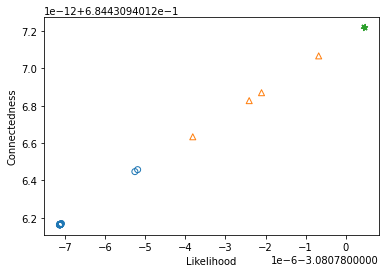

In [8]:
# Plot likelihood vs. connectedness
blm_fit.plot_liks_connectedness()

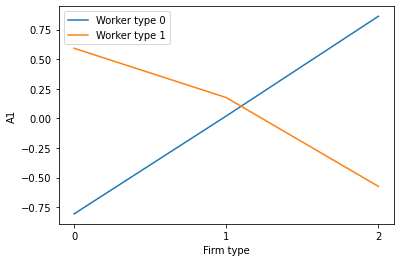

In [9]:
blm_fit.plot_A1()

# Measuring the Model's Effectiveness

## Simulate some data

The package contains functions to simulate data. We use this here to compare model estimates to true parameter values.

## Set parameter choices

In [10]:
blm_sim_params = tw.blm_params({'nl': nl, 'nk': nk, 'simulation': True})
blm_params = tw.blm_params({'nl': nl, 'nk': nk, 'fixb': False, 'stationary': False, 'n_iters_movers': 100, 'threshold_movers': 1e-7, 'd_prior': 1.0001, 'verbose': 0, 'custom_dependent_dict': {}, 'verbose': 2})

## Simulate data

In [11]:
blm_true = tw.BLMModel(blm_sim_params)
sim_data = blm_true._simulate_data(
    fsize=10, # Average number of stayers per firm
    mmult=100, # Increase observations for movers x100
    smult=100 # Increase observations for stayers x100
)
sim_data['jdata'] = bpd.BipartiteDataFrame(i=np.arange(len(sim_data['jdata'])), **sim_data['jdata'])
sim_data['sdata'] = bpd.BipartiteDataFrame(i=np.arange(len(sim_data['sdata'])), **sim_data['sdata'])

In [12]:
print('Movers data')
display(sim_data['jdata'])
print('Stayers data')
display(sim_data['sdata'])

Movers data


,i,j1,j2,y1,y2,g1,g2
0,0,64,71,1.040224,0.923464,0,0
1,1,11,64,1.072203,0.439392,0,0
2,2,25,74,1.011696,0.758721,0,0
3,3,13,11,1.259738,1.445804,0,0
4,4,53,85,0.410420,0.273736,0,0
...,...,...,...,...,...,...,...
8995,8995,260,216,1.407645,0.856373,2,2
8996,8996,296,221,0.282596,1.413779,2,2
8997,8997,286,259,1.458646,-0.326451,2,2
8998,8998,219,201,1.568111,1.061375,2,2


Stayers data


,i,j1,j2,y1,y2,g1,g2
0,0,9,9,0.681238,-0.175538,0,0
1,1,75,75,0.457797,0.916487,0,0
2,2,39,39,-0.427290,0.774629,0,0
3,3,26,26,0.760649,0.909060,0,0
4,4,97,97,-0.347748,0.340451,0,0
...,...,...,...,...,...,...,...
2995,2995,293,293,1.840513,1.310396,2,2
2996,2996,208,208,0.974829,1.037207,2,2
2997,2997,243,243,1.328382,0.558193,2,2
2998,2998,288,288,1.541882,0.817967,2,2


## Initialize and run BLMEstimator

In [13]:
# Initialize BLM estimator
blm_fit = tw.BLMEstimator(blm_params)
# Fit BLM estimator
blm_fit.fit(jdata=sim_data['jdata'], sdata=sim_data['sdata'], n_init=40, n_best=5, ncore=1)

  0%|                                                    | 0/40 [00:00<?, ?it/s]

Running fixm movers
loop 0, liks -2.6209601988812787
loop 1, liks -2.0515570905630915
loop 2, liks -1.9086762940541844
loop 3, liks -1.8558673411616886
loop 4, liks -1.8406816032734459
loop 5, liks -1.837954051219819
loop 6, liks -1.8381328675232456
loop 7, liks -1.838778231455159
loop 8, liks -1.839389056329421
loop 9, liks -1.8398531617039695
loop 10, liks -1.8401648170277343
loop 11, liks -1.8403533254365458
loop 12, liks -1.8404540114660102
loop 13, liks -1.8404970370082177
loop 14, liks -1.84050475915166
loop 15, liks -1.8404924838028762
loop 16, liks -1.8404701330808733
loop 17, liks -1.8404438471723468
loop 18, liks -1.8404172391377829
loop 19, liks -1.8403922922670217
loop 20, liks -1.84036997062247
loop 21, liks -1.8403506216679286
loop 22, liks -1.8403342358076697
loop 23, liks -1.8403206103523024
loop 24, liks -1.8403094508600897
loop 25, liks -1.8403004320210736
loop 26, liks -1.84029323273793
loop 27, liks -1.8402875549831943
loop 28, liks -1.84028313264402
loop 29, liks -

  2%|█                                           | 1/40 [00:01<01:09,  1.78s/it]

loop 63, liks -1.3824840920798316
loop 64, liks -1.3824831996430207
loop 65, liks -1.3824824487001715
loop 66, liks -1.382481814785333
loop 67, liks -1.3824812779613151
loop 68, liks -1.382480821941428
loop 69, liks -1.3824804333864575
loop 70, liks -1.3824801013414014
loop 71, liks -1.3824798167836514
loop 72, liks -1.3824795722601197
loop 73, liks -1.3824793615953936
loop 74, liks -1.3824791796566867
loop 75, liks -1.382479022164192
loop 76, liks -1.382478885537821
loop 77, liks -1.382478766773089
loop 78, liks -1.3824786633403798
loop 79, liks -1.3824785731030655
Running fixm movers
loop 0, liks -3.002893680977505
loop 1, liks -2.2622426701335088
loop 2, liks -2.016826349528561
loop 3, liks -1.9549634488198786
loop 4, liks -1.9428060700843606
loop 5, liks -1.9402623886410773
loop 6, liks -1.9396669203224535
loop 7, liks -1.939455258548094
loop 8, liks -1.9393137872676323
loop 9, liks -1.9391954693722133
loop 10, liks -1.9391117125733928
loop 11, liks -1.9390676228809558
loop 12, lik

  5%|██▏                                         | 2/40 [00:03<01:06,  1.74s/it]

loop 98, liks -1.7158755248223283
loop 99, liks -1.7158629515258181
Running fixm movers
loop 0, liks -2.3124578332315173
loop 1, liks -1.7628323821981324
loop 2, liks -1.6832476980093263
loop 3, liks -1.6655150538104297
loop 4, liks -1.6604501608355102
loop 5, liks -1.6591496019695682
loop 6, liks -1.6589678584331835
loop 7, liks -1.6590859148556347
loop 8, liks -1.6592600839380618
loop 9, liks -1.6594209911143787
loop 10, liks -1.6595523202342355
loop 11, liks -1.659653989186475
loop 12, liks -1.6597304785094456
loop 13, liks -1.659786992154337
loop 14, liks -1.6598282179488992
loop 15, liks -1.659858002869587
loop 16, liks -1.6598793576931332
loop 17, liks -1.659894571971161
loop 18, liks -1.6599053532843315
loop 19, liks -1.6599129573568334
loop 20, liks -1.6599182977932594
loop 21, liks -1.659922033710607
loop 22, liks -1.6599246373894538
loop 23, liks -1.6599264453162585
loop 24, liks -1.6599276960655374
loop 25, liks -1.6599285580706946
loop 26, liks -1.6599291497894286
loop 27, 

  8%|███▎                                        | 3/40 [00:05<01:02,  1.70s/it]

loop 78, liks -1.382478668598375
loop 79, liks -1.3824785777235604
Running fixm movers
loop 0, liks -2.695322967579391
loop 1, liks -2.476369261689908
loop 2, liks -2.215358451863843
loop 3, liks -1.984985785750733
loop 4, liks -1.9091983172555083
loop 5, liks -1.884123307829751
loop 6, liks -1.8736746174262726
loop 7, liks -1.8695297569078526
loop 8, liks -1.8679149124637018
loop 9, liks -1.8673031716439417
loop 10, liks -1.86710502574291
loop 11, liks -1.867081769667253
loop 12, liks -1.867131043565709
loop 13, liks -1.8672071658822997
loop 14, liks -1.8672894419462451
loop 15, liks -1.8673686879993963
loop 16, liks -1.8674411715420243
loop 17, liks -1.867505762252474
loop 18, liks -1.867562547729712
loop 19, liks -1.8676121475529286
loop 20, liks -1.867655372050693
loop 21, liks -1.867693055547997
loop 22, liks -1.867725979196302
loop 23, liks -1.8677548398706336
loop 24, liks -1.8677802423937109
loop 25, liks -1.8678027030778466
loop 26, liks -1.8678226582393622
loop 27, liks -1.86

loop 41, liks -1.382880287404651
loop 42, liks -1.382804072367957
loop 43, liks -1.382742309299852
loop 44, liks -1.3826923750972346
loop 45, liks -1.3826520581303443
loop 46, liks -1.382619524435576
loop 47, liks -1.3825932705011725
loop 48, liks -1.3825720734109537
loop 49, liks -1.382554943875255
loop 50, liks -1.38254108456973
loop 51, liks -1.3825298544825897
loop 52, liks -1.3825207390898548
loop 53, liks -1.3825133257783453
loop 54, liks -1.3825072837992363
loop 55, liks -1.38250234803219
loop 56, liks -1.3824983059005487
loop 57, liks -1.3824949868624714
loop 58, liks -1.3824922539913018
loop 59, liks -1.3824899972408895
loop 60, liks -1.3824881280646242
loop 61, liks -1.3824865751188566
loop 62, liks -1.3824852808333838
loop 63, liks -1.382484198674323
loop 64, liks -1.3824832909590918
loop 65, liks -1.3824825271118548
loop 66, liks -1.3824818822697644
loop 67, liks -1.3824813361689388
loop 68, liks -1.382480872253293
loop 69, liks -1.3824804769610777


 10%|████▍                                       | 4/40 [00:07<01:07,  1.88s/it]

loop 70, liks -1.3824801391530723
loop 71, liks -1.3824798496538522
loop 72, liks -1.3824796008832914
loop 73, liks -1.3824793865600957
loop 74, liks -1.3824792014630658
loop 75, liks -1.3824790412383279
loop 76, liks -1.382478902243635
loop 77, liks -1.382478781422173
loop 78, liks -1.3824786762001628
loop 79, liks -1.3824785844036083
Running fixm movers
loop 0, liks -2.4357907451761767
loop 1, liks -1.9967559682571203
loop 2, liks -1.8631832038033187
loop 3, liks -1.7974047151471826
loop 4, liks -1.7726712587195603
loop 5, liks -1.7588480443581016
loop 6, liks -1.7528306807931846
loop 7, liks -1.7500336409204102
loop 8, liks -1.748598251236306
loop 9, liks -1.7477835757423028
loop 10, liks -1.747281698567862
loop 11, liks -1.7469522109157976
loop 12, liks -1.7467257799259726
loop 13, liks -1.7465652557604572
loop 14, liks -1.7464491170449012
loop 15, liks -1.7463639892621985
loop 16, liks -1.7463010723938146
loop 17, liks -1.7462543242649367
loop 18, liks -1.746219470787513
loop 19, 

 12%|█████▌                                      | 5/40 [00:09<01:04,  1.84s/it]

loop 79, liks -1.382478594535361
Running fixm movers
loop 0, liks -3.509544567420628
loop 1, liks -2.4649272909007562
loop 2, liks -2.4657798852169908
loop 3, liks -2.4624798470496687
loop 4, liks -2.4595516149672307
loop 5, liks -2.4573308056380982
loop 6, liks -2.4556364177723062
loop 7, liks -2.4543397977757535
loop 8, liks -2.453354223914947
loop 9, liks -2.452613006061988
loop 10, liks -2.452062346821976
loop 11, liks -2.4516601415808617
loop 12, liks -2.451376424615098
loop 13, liks -2.4511935086228447
loop 14, liks -2.451101182768108
loop 15, liks -2.4510832780878036
loop 16, liks -2.4511109534721247
loop 17, liks -2.451155407316434
loop 18, liks -2.451199564043817
loop 19, liks -2.4512369293295553
loop 20, liks -2.4512663996304083
loop 21, liks -2.4512888630051277
loop 22, liks -2.4513056893488048
loop 23, liks -2.4513181792902476
loop 24, liks -2.4513274074218545
loop 25, liks -2.4513342105886973
loop 26, liks -2.4513392218716987
loop 27, liks -2.4513429130457927
loop 28, liks

 15%|██████▌                                     | 6/40 [00:10<01:02,  1.84s/it]

Running fixm movers
loop 0, liks -2.3692422796006505
loop 1, liks -2.128429594110353
loop 2, liks -2.0878804129612494
loop 3, liks -2.061967296437667
loop 4, liks -2.0444935133155875
loop 5, liks -2.0329559248193347
loop 6, liks -2.025522167500586
loop 7, liks -2.020867656584231
loop 8, liks -2.018005243988829
loop 9, liks -2.016220169739657
loop 10, liks -2.0150492293817566
loop 11, liks -2.0142260540668944
loop 12, liks -2.0136086615108724
loop 13, liks -2.0131226552361956
loop 14, liks -2.01272766465998
loop 15, liks -2.0124002075309324
loop 16, liks -2.0121254387277885
loop 17, liks -2.0118931919371374
loop 18, liks -2.0116960252317218
loop 19, liks -2.011528209905266
loop 20, liks -2.0113851764387656
loop 21, liks -2.011263190730579
loop 22, liks -2.011159151575484
loop 23, liks -2.0110704552734795
loop 24, liks -2.0109948995568057
loop 25, liks -2.0109306119876114
loop 26, liks -2.0108759945448145
loop 27, liks -2.0108296795425242
loop 28, liks -2.010790493868223
loop 29, liks -2

 18%|███████▋                                    | 7/40 [00:12<01:03,  1.92s/it]

loop 76, liks -1.3824787970813823
loop 77, liks -1.3824786892051382
loop 78, liks -1.3824785952448058
Running fixm movers
loop 0, liks -3.1965845714182572
loop 1, liks -2.2498697134268864
loop 2, liks -2.167042257002681
loop 3, liks -2.127849621557066
loop 4, liks -2.1112127153168023
loop 5, liks -2.103242411702205
loop 6, liks -2.0985542245301834
loop 7, liks -2.0955242925954747
loop 8, liks -2.093572566974124
loop 9, liks -2.092391337259198
loop 10, liks -2.0917559567352697
loop 11, liks -2.091490755713964
loop 12, liks -2.0914640560482325
loop 13, liks -2.0915821525777365
loop 14, liks -2.0917807731999694
loop 15, liks -2.0920169056493605
loop 16, liks -2.0922624251852002
loop 17, liks -2.092499578542809
loop 18, liks -2.0927178691503587
loop 19, liks -2.0929118735490135
loop 20, liks -2.093079657690951
loop 21, liks -2.0932215968268504
loop 22, liks -2.0933394909075247
loop 23, liks -2.093435913010715
loop 24, liks -2.093513747379369
loop 25, liks -2.0935758803097024
loop 26, liks 

 20%|████████▊                                   | 8/40 [00:14<01:02,  1.95s/it]

loop 62, liks -1.3824855989858498
loop 63, liks -1.3824844700433367
loop 64, liks -1.3824835230001882
loop 65, liks -1.3824827260070922
loop 66, liks -1.3824820531566526
loop 67, liks -1.3824814833268189
loop 68, liks -1.3824809992552853
loop 69, liks -1.382480586798045
loop 70, liks -1.382480234334891
loop 71, liks -1.3824799322922314
loop 72, liks -1.3824796727596036
loop 73, liks -1.3824794491810413
loop 74, liks -1.38247925610638
loop 75, liks -1.382479088990439
loop 76, liks -1.3824789440306826
loop 77, liks -1.3824788180356777
loop 78, liks -1.3824787083182744
loop 79, liks -1.3824786126087587
Running fixm movers
loop 0, liks -2.2732960683393926
loop 1, liks -1.7957072852813918
loop 2, liks -1.6650851638619242
loop 3, liks -1.6067765130128466
loop 4, liks -1.5714555949858315
loop 5, liks -1.545058542271717
loop 6, liks -1.5289876480083804
loop 7, liks -1.5202769119481514
loop 8, liks -1.5155717389975851
loop 9, liks -1.5129073741251895
loop 10, liks -1.5113132614343423
loop 11, l

loop 27, liks -1.3867834420018976
loop 28, liks -1.3862954543266375
loop 29, liks -1.3858526712639625
loop 30, liks -1.385447231480983
loop 31, liks -1.3850721711927063
loop 32, liks -1.3847233416871008
loop 33, liks -1.38440011728503
loop 34, liks -1.3841045378771974
loop 35, liks -1.3838394632352078
loop 36, liks -1.3836068405203596
loop 37, liks -1.3834068362528094
loop 38, liks -1.3832378582662308
loop 39, liks -1.383097070638658
loop 40, liks -1.382981006124081
loop 41, liks -1.3828860611216929
loop 42, liks -1.382808815906958
loop 43, liks -1.382746203152861
loop 44, liks -1.3826955708412538
loop 45, liks -1.3826546817407552
loop 46, liks -1.3826216798626332
loop 47, liks -1.382595043103653
loop 48, liks -1.382573533053124
loop 49, liks -1.382556147618506
loop 50, liks -1.3825420789583203
loop 51, liks -1.3825306774555681
loop 52, liks -1.3825214215642094
loop 53, liks -1.3825138929511118
loop 54, liks -1.3825077562134114
loop 55, liks -1.382502742446504
loop 56, liks -1.38249863

 22%|█████████▉                                  | 9/40 [00:17<01:04,  2.07s/it]

loop 79, liks -1.382478594927762
Running fixm movers
loop 0, liks -3.7486139347242244
loop 1, liks -2.9254241543471395
loop 2, liks -2.873004425240957
loop 3, liks -2.852771976146107
loop 4, liks -2.8455822732672136
loop 5, liks -2.843103659315726
loop 6, liks -2.842238648363012
loop 7, liks -2.8419328935344215
loop 8, liks -2.8418235154368086
loop 9, liks -2.8417840129286143
loop 10, liks -2.8417696429125527
loop 11, liks -2.841764387557732
loop 12, liks -2.841762458067925
loop 13, liks -2.8417617476374297
loop 14, liks -2.84176148558648
loop 15, liks -2.8417613888479676
Running constrained movers
loop 0, liks -2.8417613888479676
loop 1, liks -1.729104919980315
loop 2, liks -1.7472929569799451
loop 3, liks -1.7489951606912846
loop 4, liks -1.749079586748555
loop 5, liks -1.7490818603975002
loop 6, liks -1.7490760497085962
loop 7, liks -1.749053367256076
loop 8, liks -1.7489579969386502
loop 9, liks -1.7485532367371133
loop 10, liks -1.7473792743864407
loop 11, liks -1.7455952467882514

 25%|██████████▊                                | 10/40 [00:18<00:57,  1.91s/it]

loop 67, liks -1.3824809724178058
loop 68, liks -1.3824805579155823
loop 69, liks -1.3824802047678046
loop 70, liks -1.3824799029955772
loop 71, liks -1.382479644384992
loop 72, liks -1.3824794221545267
loop 73, liks -1.3824792306877949
loop 74, liks -1.3824790653185073
loop 75, liks -1.3824789221571643
loop 76, liks -1.3824787979510755
loop 77, liks -1.382478689971119
loop 78, liks -1.382478595919912
Running fixm movers
loop 0, liks -4.175729773818477
loop 1, liks -3.4228267700594714
loop 2, liks -3.3629738634789295
loop 3, liks -3.339978059961397
loop 4, liks -3.3265041724719704
loop 5, liks -3.3174903574814985
loop 6, liks -3.310922253707889
loop 7, liks -3.305861672195865
loop 8, liks -3.301810774466284
loop 9, liks -3.2984861622525448
loop 10, liks -3.2957133147811666
loop 11, liks -3.293375800189866
loop 12, liks -3.2913904659721878
loop 13, liks -3.289694824854621
loop 14, liks -3.2882402023985593
loop 15, liks -3.286987729861705
loop 16, liks -3.2859058335141573
loop 17, liks -

loop 44, liks -1.382681439894861
loop 45, liks -1.3826430590302907
loop 46, liks -1.3826121124256265
loop 47, liks -1.3825871587718703
loop 48, liks -1.3825670269361996
loop 49, liks -1.3825507704105735
loop 50, liks -1.3825376270328886
loop 51, liks -1.3825269845899544
loop 52, liks -1.3825183520889015
loop 53, liks -1.3825113361139898
loop 54, liks -1.3825056215631948
loop 55, liks -1.382500956062312
loop 56, liks -1.3824971374157917
loop 57, liks -1.3824940035372602
loop 58, liks -1.3824914243889723
loop 59, liks -1.3824892955400467
loop 60, liks -1.3824875330238624
loop 61, liks -1.3824860692353156
loop 62, liks -1.3824848496588231
loop 63, liks -1.3824838302589637
loop 64, liks -1.382482975399289
loop 65, liks -1.3824822561819483
loop 66, liks -1.382481649122214
loop 67, liks -1.382481135089953
loop 68, liks -1.3824806984634426
loop 69, liks -1.3824803264524097
loop 70, liks -1.3824800085559497
loop 71, liks -1.3824797361279118
loop 72, liks -1.382479502027993
loop 73, liks -1.382

 28%|███████████▊                               | 11/40 [00:21<00:57,  1.99s/it]

loop 78, liks -1.3824786317867428
Running fixm movers
loop 0, liks -2.9167864132939814
loop 1, liks -2.3544274582373776
loop 2, liks -2.144096397693885
loop 3, liks -2.043885181926199
loop 4, liks -2.0143352476036975
loop 5, liks -2.0073758647380218
loop 6, liks -2.0057541192524275
loop 7, liks -2.0053440318952647
loop 8, liks -2.0052228264376706
loop 9, liks -2.0051669124744715
loop 10, liks -2.005096375784926
loop 11, liks -2.004959946576181
loop 12, liks -2.0048023424914234
loop 13, liks -2.00472451318715
loop 14, liks -2.004692247589225
loop 15, liks -2.0046507057291016
loop 16, liks -2.0045869415537863
loop 17, liks -2.0045101956058904
loop 18, liks -2.0044241691570988
loop 19, liks -2.0043298579148328
loop 20, liks -2.004227682939148
loop 21, liks -2.0041185257768377
loop 22, liks -2.004004161147846
loop 23, liks -2.0038872993500942
loop 24, liks -2.003771337976575
loop 25, liks -2.0036599036490057
loop 26, liks -2.0035563057507373
loop 27, liks -2.0034630597923164
loop 28, liks 

loop 55, liks -1.7164002895800141
loop 56, liks -1.7163927172573124
loop 57, liks -1.7163847444830778
loop 58, liks -1.7163763790337274
loop 59, liks -1.7163676274257147
loop 60, liks -1.7163584953484112
loop 61, liks -1.7163489880431888
loop 62, liks -1.7163391106358228
loop 63, liks -1.716328868428095
loop 64, liks -1.7163182671530455
loop 65, liks -1.7163073131974855
loop 66, liks -1.716296013794424
loop 67, liks -1.7162843771873852
loop 68, liks -1.7162724127679565
loop 69, liks -1.716260131187596
loop 70, liks -1.7162475444441707
loop 71, liks -1.7162346659437082
loop 72, liks -1.7162215105375387
loop 73, liks -1.7162080945350426
loop 74, liks -1.7161944356923167
loop 75, liks -1.7161805531770913
loop 76, liks -1.7161664675105588
loop 77, liks -1.716152200486904
loop 78, liks -1.7161377750717528
loop 79, liks -1.7161232152808739
loop 80, liks -1.7161085460410537
loop 81, liks -1.716093793035145
loop 82, liks -1.7160789825337757
loop 83, liks -1.7160641412163118
loop 84, liks -1.71

 30%|████████████▉                              | 12/40 [00:23<00:58,  2.11s/it]

loop 88, liks -1.715990410949397
loop 89, liks -1.7159759440135014
loop 90, liks -1.715961628560646
loop 91, liks -1.7159474878038463
loop 92, liks -1.715933543767112
loop 93, liks -1.7159198171602899
loop 94, liks -1.7159063272718882
loop 95, liks -1.71589309188072
loop 96, liks -1.715880127186982
loop 97, liks -1.7158674477627622
loop 98, liks -1.715855066521779
loop 99, liks -1.7158429947076164
Running fixm movers
loop 0, liks -2.7090335848308635
loop 1, liks -2.3115767535821776
loop 2, liks -2.123001736826301
loop 3, liks -2.005848311136042
loop 4, liks -1.9637104345108665
loop 5, liks -1.9434411147209694
loop 6, liks -1.934436838258255
loop 7, liks -1.9302696742562535
loop 8, liks -1.9281505882988972
loop 9, liks -1.9269787857792509
loop 10, liks -1.9262860350855178
loop 11, liks -1.9258545197581014
loop 12, liks -1.9255748046566745
loop 13, liks -1.9253880966674732
loop 14, liks -1.9252608532078281
loop 15, liks -1.9251728925156648
loop 16, liks -1.9251115134395291
loop 17, liks 

 32%|█████████████▉                             | 13/40 [00:25<00:54,  2.00s/it]

Running fixm movers
loop 0, liks -2.8142511216002744
loop 1, liks -2.31667229869263
loop 2, liks -2.157665179306511
loop 3, liks -2.070427859398618
loop 4, liks -1.9911422659330622
loop 5, liks -1.9149952240334565
loop 6, liks -1.8768451380235731
loop 7, liks -1.8640876005935223
loop 8, liks -1.8600633369303063
loop 9, liks -1.8588251862473593
loop 10, liks -1.8585190310937136
loop 11, liks -1.8585074936323063
loop 12, liks -1.8585654527328765
loop 13, liks -1.8586267510931882
loop 14, liks -1.8586782167451132
loop 15, liks -1.858719406616387
loop 16, liks -1.8587508854778296
loop 17, liks -1.8587714198834269
loop 18, liks -1.8587774121227736
loop 19, liks -1.858764931019054
loop 20, liks -1.8587390122961713
loop 21, liks -1.858726861744368
loop 22, liks -1.8587644043313558
loop 23, liks -1.8588558123518382
loop 24, liks -1.8589716667027096
loop 25, liks -1.8590824261689174
loop 26, liks -1.8591752579292589
loop 27, liks -1.8592492178888578
loop 28, liks -1.8593074090185926
loop 29, li

 35%|███████████████                            | 14/40 [00:27<00:52,  2.01s/it]

Running fixm movers
loop 0, liks -2.5613869667144877
loop 1, liks -1.971568865822287
loop 2, liks -1.830650206851975
loop 3, liks -1.814553924984472
loop 4, liks -1.7119655713836657
loop 5, liks -1.6468397488452189
loop 6, liks -1.6354013959293003
loop 7, liks -1.6273705092355428
loop 8, liks -1.6211541490912575
loop 9, liks -1.6158150747241058
loop 10, liks -1.6113794172590195
loop 11, liks -1.608048144057052
loop 12, liks -1.606042541418544
loop 13, liks -1.6053320507826572
loop 14, liks -1.605568914927764
loop 15, liks -1.606269236742012
loop 16, liks -1.607045708642711
loop 17, liks -1.6076980680200597
loop 18, liks -1.6081737294465837
loop 19, liks -1.6084940054823522
loop 20, liks -1.6087002316435752
loop 21, liks -1.6088296527489947
loop 22, liks -1.6089096182413336
loop 23, liks -1.608958545699609
loop 24, liks -1.6089882998673584
loop 25, liks -1.6090063282787923
loop 26, liks -1.6090172303318542
loop 27, liks -1.609023817297442
loop 28, liks -1.6090277965447015
loop 29, liks 

 38%|████████████████▏                          | 15/40 [00:28<00:47,  1.91s/it]

Running fixm movers
loop 0, liks -3.5448858909377003
loop 1, liks -3.1597140999966244
loop 2, liks -3.1213032735777664
loop 3, liks -3.1041058316545675
loop 4, liks -3.097065543193782
loop 5, liks -3.0943040799294845
loop 6, liks -3.093244181756898
loop 7, liks -3.0928434024419085
loop 8, liks -3.092695391144116
loop 9, liks -3.0926439527764784
loop 10, liks -3.092628591029766
loop 11, liks -3.092625691743201
loop 12, liks -3.0926264577288913
loop 13, liks -3.092627930650166
loop 14, liks -3.092629247528953
loop 15, liks -3.0926302327881707
loop 16, liks -3.09263092830243
loop 17, liks -3.0926314383701405
loop 18, liks -3.092631843829327
loop 19, liks -3.092632176678731
loop 20, liks -3.0926324470642275
loop 21, liks -3.0926326624606775
loop 22, liks -3.092632831635925
loop 23, liks -3.0926329635329464
loop 24, liks -3.0926330660398667
loop 25, liks -3.0926331456113876
Running constrained movers
loop 0, liks -3.0926331456113876
loop 1, liks -1.7451302508108895
loop 2, liks -1.746039367

 40%|█████████████████▏                         | 16/40 [00:30<00:44,  1.84s/it]

loop 77, liks -1.3824788351378579
loop 78, liks -1.3824787233248628
loop 79, liks -1.3824786257903638
Running fixm movers
loop 0, liks -2.916235656771015
loop 1, liks -2.1751161588349706
loop 2, liks -2.1104430171713533
loop 3, liks -2.0739767278820382
loop 4, liks -2.0570666137763487
loop 5, liks -2.0485440173534926
loop 6, liks -2.0450392864211038
loop 7, liks -2.0442335308834845
loop 8, liks -2.0444639598327794
loop 9, liks -2.0449458281350026
loop 10, liks -2.0453834441088175
loop 11, liks -2.0457028847027146
loop 12, liks -2.045913437668152
loop 13, liks -2.046044723402296
loop 14, liks -2.0461240303249566
loop 15, liks -2.046171078307596
loop 16, liks -2.046198710685875
loop 17, liks -2.0462148561839784
loop 18, liks -2.046224268341619
loop 19, liks -2.046229751690487
loop 20, liks -2.0462329469495204
loop 21, liks -2.046234810129995
loop 22, liks -2.0462358974593475
loop 23, liks -2.04623653253988
loop 24, liks -2.046236903758235
loop 25, liks -2.046237120888606
loop 26, liks -2

 42%|██████████████████▎                        | 17/40 [00:32<00:40,  1.78s/it]

loop 79, liks -1.3824786150557107
Running fixm movers
loop 0, liks -4.178970286321463
loop 1, liks -3.3127088061184224
loop 2, liks -3.2795059504202677
loop 3, liks -3.267473175866494
loop 4, liks -3.2609909018015193
loop 5, liks -3.2562978881077638
loop 6, liks -3.2525184296509124
loop 7, liks -3.249323372375957
loop 8, liks -3.2465635242873327
loop 9, liks -3.244165827820147
loop 10, liks -3.242088357778966
loop 11, liks -3.240301051299904
loop 12, liks -3.238777361199858
loop 13, liks -3.2374910338572964
loop 14, liks -3.2364154298005245
loop 15, liks -3.2355240035463444
loop 16, liks -3.234791147411111
loop 17, liks -3.2341929735366546
loop 18, liks -3.233707855318881
loop 19, liks -3.2333166991809303
loop 20, liks -3.2330029912416998
loop 21, liks -3.232752686498514
loop 22, liks -3.232554004248015
loop 23, liks -3.232397179191198
loop 24, liks -3.2322742021963657
loop 25, liks -3.2321785718928067
loop 26, liks -3.232105069028372
loop 27, liks -3.2320495594420864
loop 28, liks -3.

loop 58, liks -1.3824928328616783
loop 59, liks -1.3824904859158909
loop 60, liks -1.3824885416620885
loop 61, liks -1.3824869260770247
loop 62, liks -1.3824855794035935
loop 63, liks -1.3824844533212002
loop 64, liks -1.3824835086859282


 45%|███████████████████▎                       | 18/40 [00:34<00:41,  1.90s/it]

loop 65, liks -1.3824827137250741
loop 66, liks -1.3824820425942002
loop 67, liks -1.3824814742230689
loop 68, liks -1.3824809913920948
loop 69, liks -1.3824805799925377
loop 70, liks -1.3824802284333844
loop 71, liks -1.3824799271652415
loop 72, liks -1.3824796682977643
loop 73, liks -1.3824794452917297
loop 74, liks -1.382479252710951
loop 75, liks -1.3824790860219571
loop 76, liks -1.3824789414320156
loop 77, liks -1.3824788157579586
loop 78, liks -1.382478706319595
loop 79, liks -1.3824786108530884
Running fixm movers
loop 0, liks -3.2653421259219546
loop 1, liks -2.708946363354134
loop 2, liks -2.6402557333602106
loop 3, liks -2.60438907186369
loop 4, liks -2.590242410041714
loop 5, liks -2.5849696137932314
loop 6, liks -2.5827850593235055
loop 7, liks -2.5817603317247637
loop 8, liks -2.5812313287533297
loop 9, liks -2.580937414331107
loop 10, liks -2.5807628445116357
loop 11, liks -2.58065151238091
loop 12, liks -2.5805748046329295
loop 13, liks -2.5805177843585154
loop 14, liks

 48%|████████████████████▍                      | 19/40 [00:36<00:39,  1.86s/it]

loop 75, liks -1.382479060958498
loop 76, liks -1.382478919493141
loop 77, liks -1.3824787965302912
loop 78, liks -1.3824786894487384
loop 79, liks -1.3824785960344845
Running fixm movers
loop 0, liks -2.2873894643928776
loop 1, liks -1.7424503160135232
loop 2, liks -1.710132096863067
loop 3, liks -1.670775932458994
loop 4, liks -1.6342766591860338
loop 5, liks -1.6161708127056327
loop 6, liks -1.6063605376934365
loop 7, liks -1.600860760666932
loop 8, liks -1.5974661454243462
loop 9, liks -1.5951938615494134
loop 10, liks -1.5935738933185215
loop 11, liks -1.5923688031781371
loop 12, liks -1.5914464385792428
loop 13, liks -1.59072678592553
loop 14, liks -1.5901577181272994
loop 15, liks -1.5897033235414701
loop 16, liks -1.5893378139604
loop 17, liks -1.5890421049794659
loop 18, liks -1.5888017584480991
loop 19, liks -1.5886056693299877
loop 20, liks -1.5884451863561637
loop 21, liks -1.5883135006511722
loop 22, liks -1.5882052082304774
loop 23, liks -1.5881159898693233
loop 24, liks 

 50%|█████████████████████▌                     | 20/40 [00:38<00:37,  1.90s/it]

Running fixm movers
loop 0, liks -2.435888839249727
loop 1, liks -1.985887132197201
loop 2, liks -1.8282134406267267
loop 3, liks -1.7320062173652735
loop 4, liks -1.696469517210451
loop 5, liks -1.685529449631127
loop 6, liks -1.6834477861123018
loop 7, liks -1.6872681506489047
loop 8, liks -1.6908450043201826
loop 9, liks -1.6907577160181042
loop 10, liks -1.68969478073816
loop 11, liks -1.688687188233827
loop 12, liks -1.6879491933750825
loop 13, liks -1.6874228392553494
loop 14, liks -1.6870370137799844
loop 15, liks -1.6867408044519039
loop 16, liks -1.6865035343259682
loop 17, liks -1.6863071109937362
loop 18, liks -1.6861409120212636
loop 19, liks -1.6859985106266047
loop 20, liks -1.6858758340691817
loop 21, liks -1.685770109499626
loop 22, liks -1.6856792813885735
loop 23, liks -1.6856016900486432
loop 24, liks -1.685535900086975
loop 25, liks -1.685480612008048
loop 26, liks -1.6854346200353816
loop 27, liks -1.685396794637938
loop 28, liks -1.6853660776855477
loop 29, liks -

loop 43, liks -1.3827538638901151
loop 44, liks -1.3827018721226745
loop 45, liks -1.3826598669724717
loop 46, liks -1.382625950003453
loop 47, liks -1.3825985633648823
loop 48, liks -1.3825764388752262
loop 49, liks -1.3825585498349664
loop 50, liks -1.3825440681677643
loop 51, liks -1.3825323276746542
loop 52, liks -1.3825227932528452
loop 53, liks -1.3825150355028204
loop 54, liks -1.3825087099970534
loop 55, liks -1.3825035404753743
loop 56, liks -1.382499305291294
loop 57, liks -1.3824958265184686
loop 58, liks -1.382492961216606
loop 59, liks -1.3824905944402879
loop 60, liks -1.3824886336492472
loop 61, liks -1.3824870042420065
loop 62, liks -1.382485645988539
loop 63, liks -1.3824845101810601
loop 64, liks -1.3824835573583016
loop 65, liks -1.3824827554871395
loop 66, liks -1.3824820785091003
loop 67, liks -1.3824815051778128
loop 68, liks -1.382481018128455
loop 69, liks -1.3824806031323607
loop 70, liks -1.3824802484992595
loop 71, liks -1.3824799445974731
loop 72, liks -1.38

 52%|██████████████████████▌                    | 21/40 [00:40<00:38,  2.04s/it]

loop 74, liks -1.382479264255339
loop 75, liks -1.3824790961146274
loop 76, liks -1.38247895026723
loop 77, liks -1.3824788235018999
loop 78, liks -1.3824787131147778
loop 79, liks -1.3824786168220118
Running fixm movers
loop 0, liks -3.8761376316591147
loop 1, liks -3.005096823501011
loop 2, liks -3.000276886818978
loop 3, liks -2.9991004175713263
loop 4, liks -2.9988061325366426
loop 5, liks -2.9989434833561526
loop 6, liks -2.9992283981899464
loop 7, liks -2.9995413094017263
loop 8, liks -2.9998354075032725
loop 9, liks -3.0000961480396495
loop 10, liks -3.000322598663148
loop 11, liks -3.000519547430664
loop 12, liks -3.0006949100835083
loop 13, liks -3.0008600411466717
loop 14, liks -3.001031394268663
loop 15, liks -3.00122965954848
loop 16, liks -3.0014688032715746
loop 17, liks -3.001739619063928
loop 18, liks -3.0020148134294162
loop 19, liks -3.0022721959791534
loop 20, liks -3.0025033386730455
loop 21, liks -3.0027080502826826
loop 22, liks -3.0028889098705482
loop 23, liks -

loop 50, liks -1.3825440652536627
loop 51, liks -1.3825323252221455
loop 52, liks -1.382522791185459
loop 53, liks -1.3825150337570997
loop 54, liks -1.382508708520299
loop 55, liks -1.3825035392238296
loop 56, liks -1.3824993042285714
loop 57, liks -1.3824958256143096
loop 58, liks -1.3824929604458127
loop 59, liks -1.3824905937818661
loop 60, liks -1.3824886330856685
loop 61, liks -1.3824870037586436
loop 62, liks -1.3824856455731436
loop 63, liks -1.3824845098233725
loop 64, liks -1.3824835570497165
loop 65, liks -1.3824827552204177
loop 66, liks -1.3824820782781475
loop 67, liks -1.3824815049774803
loop 68, liks -1.3824810179543927
loop 69, liks -1.382480602980885
loop 70, liks -1.3824802483672414
loop 71, liks -1.3824799444822446
loop 72, liks -1.3824796833675546
loop 73, liks -1.382479458427336
loop 74, liks -1.382479264178128
loop 75, liks -1.3824790960469044
loop 76, liks -1.3824789502077692
loop 77, liks -1.3824788234496423
loop 78, liks -1.3824787130688119


 55%|███████████████████████▋                   | 22/40 [00:42<00:38,  2.16s/it]

loop 79, liks -1.3824786167815428
Running fixm movers
loop 0, liks -2.6000102410233863
loop 1, liks -2.495479601976731
loop 2, liks -2.414965938751021
loop 3, liks -2.311228842519941
loop 4, liks -2.1912014179491246
loop 5, liks -2.08871564811778
loop 6, liks -2.029399870888227
loop 7, liks -2.001907851589017
loop 8, liks -1.9897897769113302
loop 9, liks -1.9844269438410673
loop 10, liks -1.9820749659556678
loop 11, liks -1.9811270700113386
loop 12, liks -1.9808565525339092
loop 13, liks -1.9809114540149924
loop 14, liks -1.9811127040633687
loop 15, liks -1.981367561859955
loop 16, liks -1.981628767595613
loop 17, liks -1.9818736297199002
loop 18, liks -1.9820927312904504
loop 19, liks -1.9822836622112558
loop 20, liks -1.9824475163283706
loop 21, liks -1.9825869521279844
loop 22, liks -1.9827051466159125
loop 23, liks -1.982805257927295
loop 24, liks -1.9828901736781157
loop 25, liks -1.982962415661676
loop 26, liks -1.983024126391374
loop 27, liks -1.983077095266111
loop 28, liks -1.

loop 45, liks -1.3826588235771529
loop 46, liks -1.3826250898961918
loop 47, liks -1.3825978535940389
loop 48, liks -1.3825758524080574
loop 49, liks -1.382558064531544
loop 50, liks -1.3825436659133978
loop 51, liks -1.3825319936554887
loop 52, liks -1.382522515355902
loop 53, liks -1.382514803821951
loop 54, liks -1.3825085164275543
loop 55, liks -1.382503378382396
loop 56, liks -1.3824991692389503
loop 57, liks -1.382495712048928
loop 58, liks -1.3824928646700445
loop 59, liks -1.3824905128082399
loop 60, liks -1.3824885644551996
loop 61, liks -1.3824869454441986
loop 62, liks -1.3824855959007813
loop 63, liks -1.3824844674083054
loop 64, liks -1.382483520744131
loop 65, liks -1.3824827240709718
loop 66, liks -1.3824820514913057
loop 67, liks -1.382481481891223


 57%|████████████████████████▋                  | 23/40 [00:45<00:37,  2.22s/it]

loop 68, liks -1.3824809980151245
loop 69, liks -1.3824805857245483
loop 70, liks -1.3824802334038675
loop 71, liks -1.3824799314832976
loop 72, liks -1.3824796720555383
loop 73, liks -1.3824794485672574
loop 74, liks -1.3824792555704857
loop 75, liks -1.3824790885218892
loop 76, liks -1.3824789436204756
loop 77, liks -1.382478817676104
loop 78, liks -1.3824787080027352
loop 79, liks -1.3824786123315678
Running fixm movers
loop 0, liks -2.179432258950878
loop 1, liks -1.6832491181825524
loop 2, liks -1.6591001037815876
loop 3, liks -1.6439946579514086
loop 4, liks -1.6315838905180209
loop 5, liks -1.6219965764196422
loop 6, liks -1.6152212066477967
loop 7, liks -1.6100006189250646
loop 8, liks -1.6050937360270925
loop 9, liks -1.6001397391766146
loop 10, liks -1.5953090056241568
loop 11, liks -1.5909233898167658
loop 12, liks -1.5872533330550291
loop 13, liks -1.5843904683833943
loop 14, liks -1.5822558637202393
loop 15, liks -1.5806988990824953
loop 16, liks -1.5795720325004692
loop 1

loop 66, liks -1.382481959497451
loop 67, liks -1.382481402782535
loop 68, liks -1.3824809298319796
loop 69, liks -1.382480526829852
loop 70, liks -1.3824801824264463
loop 71, liks -1.3824798872716886


 60%|█████████████████████████▊                 | 24/40 [00:47<00:35,  2.23s/it]

loop 72, liks -1.382479633640206
loop 73, liks -1.3824794151296473
loop 74, liks -1.382479226417661
loop 75, liks -1.38247906306567
loop 76, liks -1.3824789213602717
loop 77, liks -1.3824787981847766
loop 78, liks -1.3824786909148665
loop 79, liks -1.3824785973337754
Running fixm movers
loop 0, liks -5.24165297886139
loop 1, liks -3.998520474066788
loop 2, liks -3.9851180792502565
loop 3, liks -3.973647817413835
loop 4, liks -3.9629552867790876
loop 5, liks -3.9530728529758377
loop 6, liks -3.9440679264625067
loop 7, liks -3.9360078226699295
loop 8, liks -3.9289415095147566
loop 9, liks -3.9228811589501063
loop 10, liks -3.9177932295965308
loop 11, liks -3.9136025127070924
loop 12, liks -3.910205401634013
loop 13, liks -3.9074857945925356
loop 14, liks -3.905328507602274
loop 15, liks -3.903628060690259
loop 16, liks -3.9022930112464222
loop 17, liks -3.901247040996306
loop 18, liks -3.9004281095724194
loop 19, liks -3.899786687254193
loop 20, liks -3.899283711837543
loop 21, liks -3.8

 62%|██████████████████████████▉                | 25/40 [00:49<00:32,  2.18s/it]

loop 68, liks -1.3824804927496783
loop 69, liks -1.3824801483303093
loop 70, liks -1.382479854021623
loop 71, liks -1.3824796018090364
loop 72, liks -1.3824793850764727
loop 73, liks -1.382479198345231
loop 74, liks -1.3824790370638997
loop 75, liks -1.3824788974390592
loop 76, liks -1.382478776298617
loop 77, liks -1.3824786709812262
loop 78, liks -1.3824785792466905
Running fixm movers
loop 0, liks -6.552237168138787
loop 1, liks -4.17357021920843
loop 2, liks -4.171418802648867
loop 3, liks -4.170998903629048
loop 4, liks -4.170840058673929
loop 5, liks -4.1707853378324895
loop 6, liks -4.170765973488252
loop 7, liks -4.170759068050487
loop 8, liks -4.1707565811912755
loop 9, liks -4.170755677926657
loop 10, liks -4.170755347311453
loop 11, liks -4.170755225472165
loop 12, liks -4.170755180293487
Running constrained movers
loop 0, liks -4.170755180293487
loop 1, liks -1.7287537963312138
loop 2, liks -1.7473498688113012
loop 3, liks -1.7489982330619398
loop 4, liks -1.749080337623388

 65%|███████████████████████████▉               | 26/40 [00:51<00:28,  2.03s/it]

loop 65, liks -1.3824820881463102
loop 66, liks -1.382481504569963
loop 67, liks -1.3824810104574163
loop 68, liks -1.3824805907724822
loop 69, liks -1.382480233207781
loop 70, liks -1.3824799276614617
loop 71, liks -1.3824796658178786
loop 72, liks -1.3824794408111143
loop 73, liks -1.3824792469546185
loop 74, liks -1.382479079523621
loop 75, liks -1.3824789345797113
loop 76, liks -1.3824788088292348
loop 77, liks -1.38247869950863
loop 78, liks -1.382478604291511
Running fixm movers
loop 0, liks -2.3841520065646535
loop 1, liks -2.210295724238914
loop 2, liks -2.2037862421170944
loop 3, liks -2.1991076801496456
loop 4, liks -2.1943493582069826
loop 5, liks -2.189361626419098
loop 6, liks -2.1841987546582877
loop 7, liks -2.1789923867562804
loop 8, liks -2.173924785905252
loop 9, liks -2.1691924545709718
loop 10, liks -2.1649647028079935
loop 11, liks -2.1613522995967593
loop 12, liks -2.158394687525251
loop 13, liks -2.1560624659194665
loop 14, liks -2.1542664574341273
loop 15, liks 

loop 30, liks -1.3853409527554934
loop 31, liks -1.3849800120965607
loop 32, liks -1.3846433838167886
loop 33, liks -1.3843309075925667
loop 34, liks -1.3840449757410174
loop 35, liks -1.3837886201197818
loop 36, liks -1.3835638243870163
loop 37, liks -1.3833707413556475
loop 38, liks -1.3832077779334166
loop 39, liks -1.3830721336577028
loop 40, liks -1.3829604099256985
loop 41, liks -1.3828690917063866
loop 42, liks -1.3827948546226967
loop 43, liks -1.3827347241287806
loop 44, liks -1.3826861330888107
loop 45, liks -1.382646918925189
loop 46, liks -1.3826152896321313
loop 47, liks -1.3825897770088809
loop 48, liks -1.3825691875330104
loop 49, liks -1.3825525562023533
loop 50, liks -1.3825391056602252
loop 51, liks -1.3825282112552404
loop 52, liks -1.3825193718375381
loop 53, liks -1.3825121857105485
loop 54, liks -1.382506331027772
loop 55, liks -1.382501549924844
loop 56, liks -1.3824976357380332
loop 57, liks -1.3824944227442733
loop 58, liks -1.382491777945079
loop 59, liks -1.3

 68%|█████████████████████████████              | 27/40 [00:53<00:27,  2.14s/it]

loop 77, liks -1.3824787523424291
loop 78, liks -1.3824786506719484
loop 79, liks -1.3824785619703253
Running fixm movers
loop 0, liks -2.945859628447955
loop 1, liks -2.8863006779114975
loop 2, liks -2.864252487846464
loop 3, liks -2.851506898200801
loop 4, liks -2.8374891323959957
loop 5, liks -2.8218847310645296
loop 6, liks -2.804501007206752
loop 7, liks -2.786015523915149
loop 8, liks -2.7682110725688607
loop 9, liks -2.7534337393064705
loop 10, liks -2.742887312930116
loop 11, liks -2.7357386223241313
loop 12, liks -2.7303637449260485
loop 13, liks -2.7255479125111752
loop 14, liks -2.720704796770359
loop 15, liks -2.7157146720029597
loop 16, liks -2.7107260912065136
loop 17, liks -2.7059838346607537
loop 18, liks -2.7017035446183173
loop 19, liks -2.6980101958159755
loop 20, liks -2.69493386261775
loop 21, liks -2.6924365526202343
loop 22, liks -2.6904446843279137
loop 23, liks -2.688873920261104
loop 24, liks -2.6876437033139156
loop 25, liks -2.686683813431974
loop 26, liks -

 70%|██████████████████████████████             | 28/40 [00:55<00:24,  2.03s/it]

loop 40, liks -1.7164733005845552
loop 41, liks -1.716483446122698
loop 42, liks -1.7164919419573055
loop 43, liks -1.7164990125695747
loop 44, liks -1.7165048517227564
loop 45, liks -1.7165096262686084
loop 46, liks -1.7165134795268455
loop 47, liks -1.7165165343070103
loop 48, liks -1.71651889557027
loop 49, liks -1.716520652779345
loop 50, liks -1.7165218819555308
loop 51, liks -1.7165226474795243
loop 52, liks -1.7165230036599657
loop 53, liks -1.7165229960985484
Running fixm movers
loop 0, liks -2.581506157192064
loop 1, liks -2.3220299145822727
loop 2, liks -2.20451286899164
loop 3, liks -2.1165726032319476
loop 4, liks -2.0548348061429054
loop 5, liks -2.0174090493005616
loop 6, liks -1.9980623094423824
loop 7, liks -1.9889677091398326
loop 8, liks -1.9848285815843438
loop 9, liks -1.9828900640193283
loop 10, liks -1.9818301019780717
loop 11, liks -1.9810170840783943
loop 12, liks -1.9801591206951816
loop 13, liks -1.9791575405590678
loop 14, liks -1.9780421449654095
loop 15, li

loop 39, liks -1.7164598725686968
loop 40, liks -1.716473386762923
loop 41, liks -1.7164848533439274
loop 42, liks -1.7164945550450712
loop 43, liks -1.7165027369022274
loop 44, liks -1.7165096107385274
loop 45, liks -1.7165153592851288
loop 46, liks -1.7165201398328978
loop 47, liks -1.71652408750858


 72%|███████████████████████████████▏           | 29/40 [00:57<00:22,  2.09s/it]

loop 48, liks -1.7165273181582295
loop 49, liks -1.7165299308972815
loop 50, liks -1.7165320103420756
loop 51, liks -1.7165336285651926
loop 52, liks -1.7165348467983035
loop 53, liks -1.7165357169147792
loop 54, liks -1.7165362827154969
loop 55, liks -1.716536581043048
loop 56, liks -1.7165366427445043
Running fixm movers
loop 0, liks -2.346647435030388
loop 1, liks -2.1206782218130984
loop 2, liks -2.101052824313252
loop 3, liks -2.08169607172333
loop 4, liks -2.0618662499422644
loop 5, liks -2.042413061395868
loop 6, liks -2.0242719345024027
loop 7, liks -2.0083051853622957
loop 8, liks -1.9952021117481
loop 9, liks -1.9854161136193402
loop 10, liks -1.9791199816244225
loop 11, liks -1.9761423169753585
loop 12, liks -1.9758394350391602
loop 13, liks -1.9769765783776718
loop 14, liks -1.9779903997265849
loop 15, liks -1.9778821146245338
loop 16, liks -1.9767829173379339
loop 17, liks -1.9752535045509447
loop 18, liks -1.9735810489291399
loop 19, liks -1.971813943830411
loop 20, liks 

loop 34, liks -1.3841120645329317
loop 35, liks -1.3838459023456573
loop 36, liks -1.3836122968638007
loop 37, liks -1.383411418823715
loop 38, liks -1.3832416784715786
loop 39, liks -1.3831002371360255
loop 40, liks -1.3829836200115162
loop 41, liks -1.3828882129213849
loop 42, liks -1.38281058436981
loop 43, liks -1.3827476553797229
loop 44, liks -1.3826967631735585
loop 45, liks -1.3826556610051637
loop 46, liks -1.3826224847053712
loop 47, liks -1.38259570526759
loop 48, liks -1.3825740785278253
loop 49, liks -1.382556597638997
loop 50, liks -1.3825424508529092
loop 51, liks -1.3825309853549719
loop 52, liks -1.38252167698883
loop 53, liks -1.382514105294173
loop 54, liks -1.382507933136573
loop 55, liks -1.3825028902027876
loop 56, liks -1.382498759694469
loop 57, liks -1.3824953676376956
loop 58, liks -1.3824925743150576
loop 59, liks -1.3824902674102577
loop 60, liks -1.3824883565288768
loop 61, liks -1.3824867688222013
loop 62, liks -1.38248544549302
loop 63, liks -1.3824843390

 75%|████████████████████████████████▎          | 30/40 [01:00<00:21,  2.19s/it]

Running fixm movers
loop 0, liks -2.7139474937886154
loop 1, liks -2.4980544786373096
loop 2, liks -2.398991877005606
loop 3, liks -2.2974202144516838
loop 4, liks -2.2374891234998215
loop 5, liks -2.2084076869164817
loop 6, liks -2.1930610572281006
loop 7, liks -2.184745454659076
loop 8, liks -2.180222893947716
loop 9, liks -2.1777001785034704
loop 10, liks -2.176242051103763
loop 11, liks -2.1753693273521746
loop 12, liks -2.1748301796329192
loop 13, liks -2.174487156336514
loop 14, liks -2.174262549608289
loop 15, liks -2.174111181463438
loop 16, liks -2.174006209714458
loop 17, liks -2.173931391265109
loop 18, liks -2.1738767185705177
loop 19, liks -2.173835900931379
loop 20, liks -2.1738048896434923
loop 21, liks -2.173781006770002
loop 22, liks -2.1737624271463
loop 23, liks -2.173747868202975
loop 24, liks -2.1737364023046797
loop 25, liks -2.1737273414317615
loop 26, liks -2.173720164736145
loop 27, liks -2.1737144717121635
loop 28, liks -2.173709950892413
loop 29, liks -2.1737

 78%|█████████████████████████████████▎         | 31/40 [01:02<00:19,  2.14s/it]

loop 73, liks -1.3824793956058643
loop 74, liks -1.3824792093641853
loop 75, liks -1.3824790481492535
loop 76, liks -1.3824789082962805
loop 77, liks -1.3824787867294768
loop 78, liks -1.3824786808590666
loop 79, liks -1.3824785884975026
Running fixm movers
loop 0, liks -3.267644748712308
loop 1, liks -1.7124219466397281
loop 2, liks -1.709117391671366
loop 3, liks -1.7089137915228334
loop 4, liks -1.7088937204147567
loop 5, liks -1.7088919318803797
loop 6, liks -1.7088917708637221
loop 7, liks -1.7088917563701802
Running constrained movers
loop 0, liks -1.7088917563701802
loop 1, liks -1.737757782177016
loop 2, liks -1.7482985527502406
loop 3, liks -1.7481456848028663
loop 4, liks -1.7270031672573674
loop 5, liks -1.6131202942491072
loop 6, liks -1.4523627120186442
loop 7, liks -1.3495596297637091
loop 8, liks -1.3031649174570303
loop 9, liks -1.2824445141941647
loop 10, liks -1.2724477792460234
loop 11, liks -1.2685780334936647
loop 12, liks -1.2679895077200545
loop 13, liks -1.26803

 80%|██████████████████████████████████▍        | 32/40 [01:03<00:15,  1.97s/it]

loop 69, liks -1.3824806558592204
loop 70, liks -1.3824802942215444
loop 71, liks -1.3824799843182878
loop 72, liks -1.382479718035003
loop 73, liks -1.3824794886458207
loop 74, liks -1.3824792905587133
loop 75, liks -1.382479119109775
loop 76, liks -1.3824789703968767
loop 77, liks -1.3824788411447821
loop 78, liks -1.3824787285957008
loop 79, liks -1.3824786304201688
Running fixm movers
loop 0, liks -7.225900339106277
loop 1, liks -4.4752675194212115
loop 2, liks -4.46418517686386
loop 3, liks -4.4543688339109275
loop 4, liks -4.445231104262397
loop 5, liks -4.436945485092826
loop 6, liks -4.429571751738911
loop 7, liks -4.423123378086322
loop 8, liks -4.417571158045808
loop 9, liks -4.412853904862995
loop 10, liks -4.408890046025218
loop 11, liks -4.405588328902303
loop 12, liks -4.402856349736735
loop 13, liks -4.400606476599398
loop 14, liks -4.398759352259177
loop 15, liks -4.3972454820042195
loop 16, liks -4.396005487743207
loop 17, liks -4.394989542869176
loop 18, liks -4.39415

loop 63, liks -1.3824838174635223
loop 64, liks -1.382482964447908
loop 65, liks -1.382482246785987
loop 66, liks -1.3824816410417151
loop 67, liks -1.382481128124938
loop 68, liks -1.3824806924468367
loop 69, liks -1.382480321244269
loop 70, liks -1.3824800040387548
loop 71, liks -1.382479732202692
loop 72, liks -1.382479498611187
loop 73, liks -1.3824792973621636
loop 74, liks -1.3824791235510296
loop 75, liks -1.3824789730889864
loop 76, liks -1.382478842556219


 82%|███████████████████████████████████▍       | 33/40 [01:05<00:14,  2.01s/it]

loop 77, liks -1.3824787290830882
loop 78, liks -1.3824786302537568
Running fixm movers
loop 0, liks -3.67952086321408
loop 1, liks -1.9902410139538118
loop 2, liks -1.9873654231488411
loop 3, liks -1.9871694591368219
loop 4, liks -1.9871520276709016
loop 5, liks -1.9871503956593188
loop 6, liks -1.9871502350435384
loop 7, liks -1.9871502182287084
Running constrained movers
loop 0, liks -1.9871502182287084
loop 1, liks -1.7321853529187017
loop 2, liks -1.7476805563719855
loop 3, liks -1.749015389211629
loop 4, liks -1.749081302758366
loop 5, liks -1.7490841138593594
loop 6, liks -1.7490833815872482
loop 7, liks -1.749080799565003
loop 8, liks -1.7490716622272198
loop 9, liks -1.749032964025138
loop 10, liks -1.7488453285363452
loop 11, liks -1.7481057320592792
loop 12, liks -1.7466259963180277
loop 13, liks -1.7446937657216033
loop 14, liks -1.742609787430902
loop 15, liks -1.7406223761936197
loop 16, liks -1.7387193433784816
loop 17, liks -1.7368603386810404
loop 18, liks -1.735305779

 85%|████████████████████████████████████▌      | 34/40 [01:07<00:11,  1.90s/it]

loop 77, liks -1.3824786691699933
loop 78, liks -1.3824785776603463
Running fixm movers
loop 0, liks -4.186606734077344
loop 1, liks -3.6487196706823193
loop 2, liks -3.6386761228893945
loop 3, liks -3.631388092715833
loop 4, liks -3.6251666169345373
loop 5, liks -3.6201265091006243
loop 6, liks -3.6159790459909287
loop 7, liks -3.612429718606232
loop 8, liks -3.609207613264775
loop 9, liks -3.606101748388228
loop 10, liks -3.602969333046633
loop 11, liks -3.599731141423345
loop 12, liks -3.596360743433512
loop 13, liks -3.5928714687335903
loop 14, liks -3.5893030858127997
loop 15, liks -3.5857097131968367
loop 16, liks -3.582150221760606
loop 17, liks -3.5786817229621493
loop 18, liks -3.575355824705817
loop 19, liks -3.5722166961319495
loop 20, liks -3.569299938334993
loop 21, liks -3.5666316976910024
loop 22, liks -3.564228000378534
loop 23, liks -3.5620945949705143
loop 24, liks -3.560227566518164
loop 25, liks -3.558614750868401
loop 26, liks -3.5572377269191024
loop 27, liks -3.5

loop 66, liks -1.7155688123742676
loop 67, liks -1.7155685470830984
loop 68, liks -1.7155683083607682
loop 69, liks -1.715568094622309
loop 70, liks -1.715567904102144
loop 71, liks -1.7155677349522516
loop 72, liks -1.7155675853137184
loop 73, liks -1.7155674533676304
loop 74, liks -1.715567337370107
loop 75, liks -1.7155672356751406


 88%|█████████████████████████████████████▋     | 35/40 [01:09<00:09,  1.98s/it]

loop 76, liks -1.7155671467483014
Running fixm movers
loop 0, liks -3.1130877562908355
loop 1, liks -1.886970589063288
loop 2, liks -1.727844625366532
loop 3, liks -1.6894480336982052
loop 4, liks -1.6838052878316596
loop 5, liks -1.6831992889161371
loop 6, liks -1.6830862753599176
loop 7, liks -1.683061958487793
loop 8, liks -1.683063290127525
loop 9, liks -1.6830670901490676
loop 10, liks -1.6830618515538749
loop 11, liks -1.6830482706456253
loop 12, liks -1.6830530869336426
loop 13, liks -1.6830682591870234
loop 14, liks -1.6830803401599186
loop 15, liks -1.6830863027860732
loop 16, liks -1.6830883583326657
loop 17, liks -1.683088492674298
loop 18, liks -1.6830877507063622
loop 19, liks -1.6830866256553303
loop 20, liks -1.6830853527105643
loop 21, liks -1.6830840492384407
loop 22, liks -1.683082776198263
loop 23, liks -1.6830815655565459
loop 24, liks -1.6830804333281155
loop 25, liks -1.683079386292086
loop 26, liks -1.6830784257240763
loop 27, liks -1.6830775496034467
loop 28, li

 90%|██████████████████████████████████████▋    | 36/40 [01:11<00:07,  1.97s/it]

loop 67, liks -1.382481567392546
loop 68, liks -1.3824810718649692
loop 69, liks -1.3824806496401056
loop 70, liks -1.3824802888283965
loop 71, liks -1.382479979632877
loop 72, liks -1.3824797139574394
loop 73, liks -1.3824794850915059
loop 74, liks -1.3824792874557867
loop 75, liks -1.3824791163970724
loop 76, liks -1.382478968022189
loop 77, liks -1.3824788390634388
loop 78, liks -1.3824787267693968
loop 79, liks -1.38247862881597
Running fixm movers
loop 0, liks -3.3359618229799284
loop 1, liks -1.9718881971538107
loop 2, liks -1.8239400813207782
loop 3, liks -1.7948287360675288
loop 4, liks -1.7868090480600427
loop 5, liks -1.7839867142193355
loop 6, liks -1.7827871287150618
loop 7, liks -1.7821941734801716
loop 8, liks -1.7818657163274025
loop 9, liks -1.7816693913050838
loop 10, liks -1.781547570353713
loop 11, liks -1.781468900672835
loop 12, liks -1.781417876315663
loop 13, liks -1.781384975106115
loop 14, liks -1.781358653420057
loop 15, liks -1.7813371354217868
loop 16, liks 

 92%|███████████████████████████████████████▊   | 37/40 [01:13<00:05,  1.84s/it]

loop 39, liks -1.7164617279535495
loop 40, liks -1.716468313835194
loop 41, liks -1.7164734172927665
loop 42, liks -1.7164772315294778
loop 43, liks -1.7164799210387056
loop 44, liks -1.716481625492885
loop 45, liks -1.7164824631090059
loop 46, liks -1.716482533611254
Running fixm movers
loop 0, liks -3.555860294400184
loop 1, liks -2.8867829071532123
loop 2, liks -2.7249314861717346
loop 3, liks -2.6728277466241495
loop 4, liks -2.6581510462204183
loop 5, liks -2.654111832183745
loop 6, liks -2.652964165726988
loop 7, liks -2.65261969660533
loop 8, liks -2.652510440637986
loop 9, liks -2.6524740390783164
loop 10, liks -2.6524614171422365
loop 11, liks -2.6524569030330953
loop 12, liks -2.652455250114605
loop 13, liks -2.6524546338918373
loop 14, liks -2.6524544008592277
loop 15, liks -2.652454311565386
Running constrained movers
loop 0, liks -2.652454311565386
loop 1, liks -1.7293762965011943
loop 2, liks -1.7473163051320848
loop 3, liks -1.7489960996563874
loop 4, liks -1.74907912622

 95%|████████████████████████████████████████▊  | 38/40 [01:15<00:03,  1.85s/it]

Running fixm movers
loop 0, liks -3.1447880291947934
loop 1, liks -3.0536697313207775
loop 2, liks -3.0466451936305283
loop 3, liks -3.0429355295885627
loop 4, liks -3.0394858421547633
loop 5, liks -3.0364517402016116
loop 6, liks -3.033691357495886
loop 7, liks -3.031128646418495
loop 8, liks -3.028699837764152
loop 9, liks -3.026355433220225
loop 10, liks -3.0240564742215104
loop 11, liks -3.0217718799716264
loop 12, liks -3.0194760995111847
loop 13, liks -3.0171470586914597
loop 14, liks -3.014764124962179
loop 15, liks -3.0123057181903197
loop 16, liks -3.0097461262438805
loop 17, liks -3.0070512320871514
loop 18, liks -3.0041738805538882
loop 19, liks -3.001053352901275
loop 20, liks -2.9976336011127094
loop 21, liks -2.9939322495558147
loop 22, liks -2.9901822133270524
loop 23, liks -2.9869143664874014
loop 24, liks -2.9846494670854082
loop 25, liks -2.9833978472402265
loop 26, liks -2.9827717017041513
loop 27, liks -2.9824279221186973
loop 28, liks -2.9821910460382446
loop 29, l

loop 42, liks -1.3828147143419658
loop 43, liks -1.3827510763496824
loop 44, liks -1.3826995983568333
loop 45, liks -1.3826580125536612
loop 46, liks -1.3826244370640297
loop 47, liks -1.3825973281118205
loop 48, liks -1.3825754292781647
loop 49, liks -1.382557723583534
loop 50, liks -1.3825433909219982
loop 51, liks -1.3825317715961423
loop 52, liks -1.3825223357875238
loop 53, liks -1.3825146583812473
loop 54, liks -1.3825083984182343
loop 55, liks -1.3825032824432657
loop 56, liks -1.3824990910769452
loop 57, liks -1.3824956482249144
loop 58, liks -1.3824928124273406
loop 59, liks -1.3824904699355307
loop 60, liks -1.3824885291770155
loop 61, liks -1.3824869163335016
loop 62, liks -1.38248557180922
loop 63, liks -1.3824844474105347
loop 64, liks -1.3824835040933985
loop 65, liks -1.3824827101636719
loop 66, liks -1.3824820398386757
loop 67, liks -1.3824814720967238
loop 68, liks -1.3824809897563861
loop 69, liks -1.3824805787389094
loop 70, liks -1.3824802274768224


 98%|█████████████████████████████████████████▉ | 39/40 [01:17<00:02,  2.06s/it]

loop 71, liks -1.3824799264392245
loop 72, liks -1.3824796677502813
loop 73, liks -1.3824794448821536
loop 74, liks -1.3824792524075913
loop 75, liks -1.3824790858001128
loop 76, liks -1.3824789412724796
loop 77, liks -1.3824788156458023
loop 78, liks -1.3824787062432613
loop 79, liks -1.3824786108036287
Running fixm movers
loop 0, liks -2.9536353603531555
loop 1, liks -1.6993290445881697
loop 2, liks -1.6767634690738695
loop 3, liks -1.6716743157261895
loop 4, liks -1.6704661183605618
loop 5, liks -1.6701661529828553
loop 6, liks -1.6700851333718592
loop 7, liks -1.6700591242194958
loop 8, liks -1.6700485353360333
loop 9, liks -1.6700431323951725
loop 10, liks -1.6700398962509664
loop 11, liks -1.6700377544867646
loop 12, liks -1.6700362443057775
loop 13, liks -1.6700351316428412
loop 14, liks -1.6700342844520955
loop 15, liks -1.670033622424004
loop 16, liks -1.6700330939692196
loop 17, liks -1.670032664542111
loop 18, liks -1.6700323102264936
loop 19, liks -1.670032014000149
loop 20

100%|███████████████████████████████████████████| 40/40 [01:19<00:00,  1.99s/it]

loop 72, liks -1.3824794455897929
loop 73, liks -1.3824792511240223
loop 74, liks -1.3824790831668383
loop 75, liks -1.3824789377675513
loop 76, liks -1.3824788116221958
loop 77, liks -1.3824787019585252
loop 78, liks -1.3824786064428218
liks_max: -1.3824785619703253
Running stayers
loop 0, liks -0.7187225561577945
loop 1, liks -0.6900535232736125
loop 2, liks -0.6731107824186634
loop 3, liks -0.6626622448124774
loop 4, liks -0.6558991075110943
loop 5, liks -0.6513203175340296
loop 6, liks -0.6480966143261822
loop 7, liks -0.6457498553061152
loop 8, liks -0.6439922726084109
loop 9, liks -0.6426436303316607
loop 10, liks -0.641586905921544
loop 11, liks -0.6407436463294107
loop 12, liks -0.6400597469764072
loop 13, liks -0.6394969569120565
loop 14, liks -0.6390276402970757
loop 15, liks -0.6386314500249477
loop 16, liks -0.6382931579460441
loop 17, liks -0.6380012041184636
loop 18, liks -0.6377467045513795
loop 19, liks -0.6375227582977829
loop 20, liks -0.6373239543483833
loop 21, liks

## Finally, compare truth to estimates

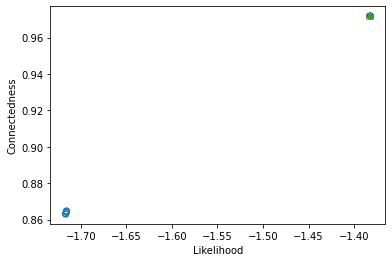

In [14]:
# Plot likelihood vs. connectedness
blm_fit.plot_liks_connectedness()

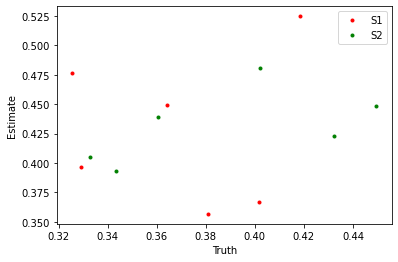

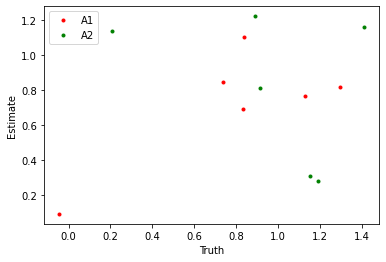

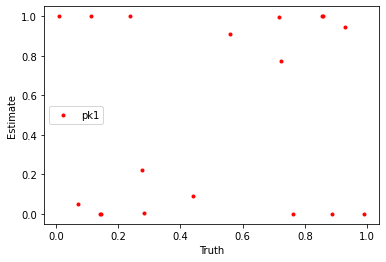

In [15]:
# Plot parameter truth vs. estimates
plt.plot(blm_true.S1.flatten(), blm_fit.model.S1.flatten(), '.', label='S1', color='red')
plt.plot(blm_true.S2.flatten(), blm_fit.model.S2.flatten(), '.', label='S2', color='green')
plt.xlabel('Truth')
plt.ylabel('Estimate')
plt.legend()
plt.show()

plt.plot(blm_true.A1.flatten(), blm_fit.model.A1.flatten(), '.', label='A1', color='red')
plt.plot(blm_true.A2.flatten(), blm_fit.model.A2.flatten(), '.', label='A2', color='green')
plt.xlabel('Truth')
plt.ylabel('Estimate')
plt.legend()
plt.show()

plt.plot(blm_true.pk1.flatten(), blm_fit.model.pk1.flatten(), '.', label='pk1', color='red')
plt.xlabel('Truth')
plt.ylabel('Estimate')
plt.legend()
plt.show()